In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
import scipy.stats as sts
pd.set_option('display.max_columns', 50)
from matplotlib.ticker import FormatStrFormatter
sns.set_style(style='whitegrid')

# Chargement des données

####  *<font color='purple'> Fonction null_value_rate </font>*

In [17]:
def null_value_rate(data):
    
    """ Calcule le taux de valeur nulle par feature"""
    
    nb_observations = len(data)
    null_values = pd.DataFrame(data.isna().sum()).rename(columns={0: 'null_value_rate'})
    null_values['null_value_rate'] = (null_values['null_value_rate']/nb_observations*100).apply(lambda x: round(x, 1))
    return null_values

In [4]:
customer = pd.read_csv('olist_customers_dataset.csv')

In [5]:
customer.shape

(99441, 5)

In [18]:
null_value_rate(customer)

,null_value_rate
customer_id,0.0
customer_unique_id,0.0
customer_zip_code_prefix,0.0
customer_city,0.0
customer_state,0.0


In [6]:
len(customer['customer_unique_id'].unique())

In [19]:
orders = pd.read_csv('olist_orders_dataset.csv')
null_value_rate(orders)

,null_value_rate
order_id,0.0
customer_id,0.0
order_status,0.0
order_purchase_timestamp,0.0
order_approved_at,0.2
order_delivered_carrier_date,1.8
order_delivered_customer_date,3.0
order_estimated_delivery_date,0.0


In [21]:
items = pd.read_csv('olist_order_items_dataset.csv')
null_value_rate(items)

,null_value_rate
order_id,0.0
order_item_id,0.0
product_id,0.0
seller_id,0.0
shipping_limit_date,0.0
price,0.0
freight_value,0.0


In [10]:
items.shape

(112650, 7)

In [22]:
payments = pd.read_csv('olist_order_payments_dataset.csv')
null_value_rate(payments)

,null_value_rate
order_id,0.0
payment_sequential,0.0
payment_type,0.0
payment_installments,0.0
payment_value,0.0


In [23]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
null_value_rate(reviews)

,null_value_rate
review_id,0.0
order_id,0.0
review_score,0.0
review_comment_title,88.3
review_comment_message,58.7
review_creation_date,0.0
review_answer_timestamp,0.0


In [24]:
products = pd.read_csv('olist_products_dataset.csv')
null_value_rate(products)

,null_value_rate
product_id,0.0
product_category_name,1.9
product_name_lenght,1.9
product_description_lenght,1.9
product_photos_qty,1.9
product_weight_g,0.0
product_length_cm,0.0
product_height_cm,0.0
product_width_cm,0.0


In [25]:
products_category = pd.read_csv('product_category_name_translation.csv')
null_value_rate(products_category)

,null_value_rate
product_category_name,0.0
product_category_name_english,0.0


In [26]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
null_value_rate(sellers)

,null_value_rate
seller_id,0.0
seller_zip_code_prefix,0.0
seller_city,0.0
seller_state,0.0


In [27]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
null_value_rate(geolocation)

,null_value_rate
geolocation_zip_code_prefix,0.0
geolocation_lat,0.0
geolocation_lng,0.0
geolocation_city,0.0
geolocation_state,0.0


# Nettoyage
### Products

In [17]:
# Verification des doublons de products
products.shape

(32951, 9)

In [18]:
len(products['product_id'].unique())

32951

In [19]:
# Pas de doublon
# Même vérification pour products_category
products_category.shape

(71, 2)

In [20]:
len(products_category['product_category_name_english'].unique())

71

In [21]:
# traduction en anglais de product category 
products = pd.merge(products, products_category, left_on='product_category_name', right_on='product_category_name', how='outer')
products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery


In [22]:
products['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [23]:
# 13 product_category_name english sont manquants tandis que presents pour product_category_name
products.loc[products['product_category_name_english'].isna()].loc[products['product_category_name'].notna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
32821,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
32822,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
32823,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
32928,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
32929,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
32930,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
32931,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
32932,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
32933,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
32934,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


In [24]:
#Traduction de ces catégories
index1 = products.loc[products['product_category_name_english'].isna()].loc[products['product_category_name'].notna()]\
.loc[products['product_category_name']=='pc_gamer'].index

In [25]:
products.iloc[index1, -1] = 'computers_accessories'
products.iloc[index1, -1]

32821    computers_accessories
32822    computers_accessories
32823    computers_accessories
Name: product_category_name_english, dtype: object

In [26]:
index2 = products.loc[products['product_category_name_english'].isna()].loc[products['product_category_name'].notna()]\
.loc[products['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos'].index

In [27]:
products.iloc[index2, -1] = 'home_appliances'
products.iloc[index2, -1]

32928    home_appliances
32929    home_appliances
32930    home_appliances
32931    home_appliances
32932    home_appliances
32933    home_appliances
32934    home_appliances
32935    home_appliances
32936    home_appliances
32937    home_appliances
Name: product_category_name_english, dtype: object

In [28]:
# Remplacement des valeurs nulles de product_category_name_english par unknown
products.loc[products['product_category_name_english'].isna(), 'product_category_name_english']='unknown'
products.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64

In [29]:
# Création d'une feature qui contient l'info encombrement ()
products['clutter'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm'] 

In [30]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,clutter
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,2240.0
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,2700.0
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,6048.0
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,3757.0
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,3510.0


In [31]:
# puis suppression des features inintéressantes pour l'étude
products = products.drop(['product_category_name', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)
products.head(1)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name_english,clutter
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,perfumery,2240.0


In [32]:
products.shape

(32951, 7)

### Orders

In [33]:
#Verification des doublons dans orders
orders.shape

(99441, 8)

In [689]:
orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [34]:
len(orders['order_id'].unique())

99441

In [35]:
# Pas de doublon
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Customers

In [36]:
# Verification doublons dans customer
customer.shape

(99441, 5)

In [37]:
len(customer['customer_id'].unique())

99441

In [38]:
customer['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [39]:
#Suppression des colonnes customer_city et zipcode redondantes avec customer_state et trop précises
customer = customer.drop(['customer_city', 'customer_zip_code_prefix'], axis=1)

In [40]:
customer.head(1)

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP


## Données par commande
#### Date and time

In [41]:
# On fusionne les données de orders et les données de customer
data = pd.merge(customer, orders, left_on='customer_id', right_on='customer_id')

In [42]:
data.shape

(99441, 10)

In [43]:
#suppression de la colonne customer_id
data = data.drop('customer_id', axis=1)

In [44]:
data.head(1)

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00


In [45]:
# Suppression des colonnes order_approved_at, order_delivered_carrier_date qui ne semblent pas pertinentes pour l'objet de l'étude
data = data.drop(['order_approved_at', 'order_delivered_carrier_date'], axis=1)

In [46]:
type((data.loc[data.index==0]['order_purchase_timestamp'][0]))

str

#### Date of purchase

In [47]:
# Séparation de l'information order_purchase_timestamp en jour d'achat et heure d'achat 
data['date_of_purchase'] = pd.to_datetime(data['order_purchase_timestamp']).dt.date
data['time_of_purchase'] = pd.to_datetime(data['order_purchase_timestamp']).dt.time

In [48]:
# Creation de 2 colonnes indiquant si le client commande la semaine ou le week-end
data['week_end'] = data['date_of_purchase'].apply(lambda x: np.where(x.weekday()>4, 1, 0))
data['week'] = data['date_of_purchase'].apply(lambda x: np.where(x.weekday()<5, 1, 0))
data

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,date_of_purchase,time_of_purchase,week_end,week
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16,15:05:35,0,1
1,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12,20:48:24,0,1
2,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-19,16:07:45,1,0
3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13,16:06:38,0,1
4,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29,09:51:30,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25 00:00:00,2018-04-07,15:48:17,1,0
99437,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20 00:00:00,2018-04-04,08:20:22,0,1
99438,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02 00:00:00,2018-04-08,20:11:50,1,0
99439,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11-03,21:08:33,0,1


#### Time of purchase

In [49]:
# Creation de 4 colonnes indiquant si le client commande le matin, l'après midi, le soir ou la nuit
time_of_day = pd.DataFrame({'order_id':list(data['order_id'])}, index= pd.to_datetime(data['order_purchase_timestamp']))

In [50]:
time_of_day.shape

(99441, 1)

In [51]:
morning = time_of_day.between_time('6:00', '13:00', inclusive='left')
morning.shape

(28235, 1)

In [52]:
afternoon = time_of_day.between_time('13:00', '18:00', inclusive='left')
afternoon.shape

(32366, 1)

In [53]:
evening = time_of_day.between_time('18:00', '23:59', inclusive='left')
evening.shape

(34044, 1)

In [54]:
night = time_of_day.between_time('23:59', '6:00', inclusive='left')
night.shape

(4796, 1)

In [55]:
data['morning'] = 0
mask = data['order_id'].isin(list(morning['order_id']))
data.loc[mask, 'morning'] = 1
data['morning'].value_counts()

0    71206
1    28235
Name: morning, dtype: int64

In [56]:
data['afternoon'] = 0
mask = data['order_id'].isin(list(afternoon['order_id']))
data.loc[mask, 'afternoon'] = 1
data['afternoon'].value_counts()

0    67075
1    32366
Name: afternoon, dtype: int64

In [57]:
data['evening'] = 0
mask = data['order_id'].isin(list(evening['order_id']))
data.loc[mask, 'evening'] = 1
data['evening'].value_counts()

0    65397
1    34044
Name: evening, dtype: int64

In [58]:
data['night'] = 0
mask = data['order_id'].isin(list(night['order_id']))
data.loc[mask, 'night'] = 1
data['night'].value_counts()

0    94645
1     4796
Name: night, dtype: int64

In [59]:
data.head(1)

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,date_of_purchase,time_of_purchase,week_end,week,morning,afternoon,evening,night
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16,15:05:35,0,1,0,1,0,0


#### Livraison estimée / réelle

In [60]:
# Suppression des 2 colonnes order_delivered_customer_date et order_estimated_delivery_date non pertinentes pour segmenter les clients
data = data.drop(['order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)

In [61]:
data.shape

(99441, 13)

In [62]:
data.head(1)

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,date_of_purchase,time_of_purchase,week_end,week,morning,afternoon,evening,night
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,15:05:35,0,1,0,1,0,0


### Items

In [63]:
# verfication des doublons dans items
items.shape

(112650, 7)

In [64]:
len(items['order_id'].unique())

98666

In [65]:
items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [66]:
doublons = items.duplicated(subset=['order_id', 'product_id'], keep=False)
items[doublons].sort_values('order_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
...,...,...,...,...,...,...,...
112634,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [67]:
# Les commandes comportant plusieurs fois le même produit sont éclatées en plusieurs lignes avec une seule fois ce produit par ligne
# Nous allons regrouper ces lignes dans une même ligne (une ligne par produit)
# D'abord classer par ordre croissant
items.sort_values(by=['order_id', 'product_id', 'order_item_id'], inplace=True)

In [68]:
# Puis on ne garde que le dernier, comportant le nombre de fois que le même produit a été commandé
items = items.drop_duplicates(subset=['order_id', 'product_id'], keep='last')

In [69]:
# Enfin on remplace le prix unitaire par le prix total (price et freight_value)
items.loc[:, 'price'] = items['price'] * items['order_item_id'] 
items.loc[:, 'freight_value'] = items['freight_value'] * items['order_item_id'] 

In [70]:
# Verification qu'il n'y a plus de doublon
doublons = items.duplicated(subset=['order_id', 'product_id'], keep=False)
items[doublons].sort_values('order_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [71]:
items.loc[items['order_id']=='fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,220.0,136.76


In [72]:
len(items['order_id'].unique())

98666

In [73]:
items.shape

(102425, 7)

In [74]:
# Regardons ce qu'il y a dans les orders_id dupliqués
doublons = items.duplicated(subset='order_id', keep=False)
items[doublons].sort_values('order_id').head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
81,002f98c0f7efd42638ed6100ca699b42,2,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2017-08-10 09:30:15,89.80,14.32
80,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,2017-08-10 09:30:15,8.99,32.57
92,00337fe25a3780b3424d9ad7c5a4b35e,2,13944d17b257432717fd260e69853140,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,119.80,19.88
91,00337fe25a3780b3424d9ad7c5a4b35e,1,1f9799a175f50c9fa725984775cac5c5,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,59.90,9.94
153,005d9a5423d47281ac463a968b3936fb,3,4c3ae5db49258df0784827bdacf3b396,d98eec89afa3380e14463da2aabaea72,2017-10-24 12:28:16,74.97,40.74


#### Fusion avec Products

In [75]:
# On ajoute la description des products à items
items_products = pd.merge(items, products, left_on='product_id', right_on='product_id')

In [76]:
items_products.shape

(102425, 13)

In [77]:
items_products.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_name_lenght              1460
product_description_lenght       1460
product_photos_qty               1460
product_weight_g                   16
product_category_name_english       0
clutter                            16
dtype: int64

In [78]:
# Supression de shipping_limit_date inutile pour notre sujet
items_products = items_products.drop('shipping_limit_date', axis=1)

In [79]:
# Regardons ce qu'il y a dans les orders_id dupliqués
doublons = items_products.duplicated(subset=['order_id'], keep=False)
items_products[doublons].sort_values('order_id').head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name_english,clutter
1991,002f98c0f7efd42638ed6100ca699b42,2,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,89.80,14.32,45.0,589.0,4.0,200.0,toys,1232.0
2085,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,8.99,32.57,44.0,228.0,1.0,450.0,consoles_games,5250.0
2140,00337fe25a3780b3424d9ad7c5a4b35e,2,13944d17b257432717fd260e69853140,cfb1a033743668a192316f3c6d1d2671,119.80,19.88,48.0,203.0,1.0,400.0,bed_bath_table,4200.0
2146,00337fe25a3780b3424d9ad7c5a4b35e,1,1f9799a175f50c9fa725984775cac5c5,cfb1a033743668a192316f3c6d1d2671,59.90,9.94,51.0,82.0,1.0,1000.0,bed_bath_table,5000.0
4197,005d9a5423d47281ac463a968b3936fb,3,4c3ae5db49258df0784827bdacf3b396,d98eec89afa3380e14463da2aabaea72,74.97,40.74,44.0,304.0,1.0,100.0,baby,1280.0


#### Catégories par commande

In [80]:
# création d'un tableau avec les lignes d'une même commande agrégés et les différentes catégories des achats éclatés en plusieurs colonnes
# La première colonne correspond au montant le plus important
category_products = items_products.loc[:, ['order_id', 'product_category_name_english', 'price']].copy()
category_products.head(1)

,order_id,product_category_name_english,price
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.9


In [81]:
doublons = category_products.duplicated(subset=['order_id'], keep=False)
category_products[doublons].sort_values('order_id').head(6)

,order_id,product_category_name_english,price
1991,002f98c0f7efd42638ed6100ca699b42,toys,89.80
2085,002f98c0f7efd42638ed6100ca699b42,consoles_games,8.99
2140,00337fe25a3780b3424d9ad7c5a4b35e,bed_bath_table,119.80
2146,00337fe25a3780b3424d9ad7c5a4b35e,bed_bath_table,59.90
4197,005d9a5423d47281ac463a968b3936fb,baby,74.97
4203,005d9a5423d47281ac463a968b3936fb,toys,49.99


####   *<font color='purple'> Fonction row_to_column </font>*

In [82]:
def row_to_column(df, col1, col2, col3):
    
    """ Place les différentes valeurs de col2 correspondant à une même valeur de col1 en différentes colonnes """
    """ Les valeurs de col2 correspondant aux valeurs les plus fortes de col3 sont dans les colonnes d'indices les plus petits"""
    
    df1 = df.sort_values([col1, col3], ascending=False).drop(col3, axis=1)
    df1 = df1.groupby(col1).agg({col2: lambda x: list(pd.Series(x).unique())}).reset_index()
    length = [len(df1.iloc[i, 1]) for i in range(len(df1))]
    diff_cat = [sum(1 for x in df1.iloc[i, 1] if x != None) for i in range(len(df1))]
    leng = max(length)
    rows = list(df1[col2])
    category = pd.DataFrame(index=df1[col1], columns=[i for i in range(leng)], data=rows).reset_index()
    category['diff_cat'] = diff_cat
    return category

In [83]:
category = row_to_column(category_products, 'order_id', 'product_category_name_english', 'price')

In [84]:
category.loc[category['order_id']=='005d9a5423d47281ac463a968b3936fb']

,order_id,0,1,2,diff_cat
134,005d9a5423d47281ac463a968b3936fb,baby,toys,None,2


In [85]:
category = category.rename(columns={0: 'category1', 1:'category2', 2:'category3'})
category.head()

,order_id,category1,category2,category3,diff_cat
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,None,None,1
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,None,None,1
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,None,None,1
3,00024acbcdf0a6daa1e931b038114c75,perfumery,None,None,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,None,None,1


In [86]:
category['diff_cat'].value_counts()

1    97880
2      768
3       18
Name: diff_cat, dtype: int64

In [87]:
items_products.shape

(102425, 12)

In [88]:
data.loc[data['order_id']=='fffb9224b6fc7c43ebb0904318b10b5f']

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,date_of_purchase,time_of_purchase,week_end,week,morning,afternoon,evening,night
35079,f736308cd9952b33b90b9fe94da9c8f5,PE,fffb9224b6fc7c43ebb0904318b10b5f,delivered,2017-10-27 16:51:00,2017-10-27,16:51:00,0,1,0,1,0,0


### Nombre de vendeurs par commande

####   *<font color='purple'> Fonction count_values </font>*

In [89]:
def count_values(df, col1, col2):
    
    """ Compte le nombre de valeurs de la col2 par individu de la col1 lors de l'agrégation suivant col1"""
    
    df1 = df.groupby(col1).agg({col2: lambda x: len(list(pd.Series(x).dropna()))}).reset_index()
    rows = list(df1[col2])
    counts = pd.DataFrame(index=df1[col1], columns=['count'], data=rows).reset_index()
    return counts

####   *<font color='purple'> Fonction count_different_values </font>*

In [90]:
def count_different_values(df, col1, col2):
    
    
    """ Compte le nombre de valeurs différentes de la col2 par individu de la col1 lors de l'agrégation suivant col1"""
    
    df1 = df.groupby(col1).agg({col2: lambda x: len(list(pd.Series(x).dropna().unique()))}).reset_index()
    rows = list(df1[col2])
    counts = pd.DataFrame(index=df1[col1], columns=['count'], data=rows).reset_index()
    return counts

In [91]:
number_sellers = items_products.loc[:, ['order_id', 'seller_id']].copy()

In [92]:
number_sellers = count_different_values(number_sellers, 'order_id', 'seller_id')

In [93]:
number_sellers['count'].value_counts()

1    97388
2     1219
3       54
4        3
5        2
Name: count, dtype: int64

#### Nombre de produits différents par commande

In [94]:
number_diff_products = items_products.loc[:, ['order_id', 'product_id']].copy()

In [95]:
number_diff_products = count_different_values(number_diff_products, 'order_id', 'product_id')

In [96]:
number_diff_products.head()

,order_id,count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


#### Aggrégation de Items

In [97]:
# Aggrégation de items_products pour avoir une ligne par commande avec des stratégies différentes par features

In [98]:
items_products = items_products.drop(['product_id', 'seller_id', 'product_category_name_english'], axis=1)

In [99]:
items_products.head(1)

,order_id,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,clutter
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.9,13.29,58.0,598.0,4.0,650.0,3528.0


In [100]:
items_products1 = items_products.groupby('order_id').agg({'order_item_id': 'sum', 
                                           'price':'sum', 
                                           'freight_value': 'sum', 
                                                          'product_weight_g' : 'mean', 
                                                          'clutter': 'mean',
                                           'product_name_lenght':'mean', 
                                           'product_description_lenght' : ['mean', 'max'], 
                                           'product_photos_qty' : 'min'}).reset_index()

In [101]:
items_products1.columns = items_products1.columns.map('_'.join)
items_products1.head()

,order_id_,order_item_id_sum,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,650.0,3528.0,58.0,598.0,598.0,4.0
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,30000.0,60000.0,56.0,239.0,239.0,2.0
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,3050.0,14157.0,59.0,695.0,695.0,2.0
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,200.0,2400.0,42.0,480.0,480.0,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,3750.0,42000.0,59.0,409.0,409.0,1.0


In [102]:
items_products1 = items_products1.rename(columns={'order_id_':'order_id'})
items_products1.head()

,order_id,order_item_id_sum,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,650.0,3528.0,58.0,598.0,598.0,4.0
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,30000.0,60000.0,56.0,239.0,239.0,2.0
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,3050.0,14157.0,59.0,695.0,695.0,2.0
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,200.0,2400.0,42.0,480.0,480.0,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,3750.0,42000.0,59.0,409.0,409.0,1.0


In [103]:
number_diff_products.shape

(98666, 2)

In [104]:
items_products1.shape

(98666, 10)

In [105]:
# Ajout des colonnes précédemment préparées : Nombre de produits différents par commande, Nombre de vendeurs par commande, Catégories par commande
items_products1 = pd.merge(items_products1, number_diff_products, left_on='order_id', right_on='order_id')
items_products1.shape

(98666, 11)

In [106]:
number_sellers.shape

(98666, 2)

In [107]:
items_products1 = pd.merge(items_products1, number_sellers, left_on='order_id', right_on='order_id')
items_products1.shape

(98666, 12)

In [108]:
category.shape

(98666, 5)

In [109]:
items_products1 = pd.merge(items_products1, category, left_on='order_id', right_on='order_id')
items_products1.shape

(98666, 16)

In [110]:
items_products1 = items_products1.rename(columns={'count_x': 'nb_dif_products', 'count_y':'nb_dif_sellers'})

In [111]:
items_products1 = items_products1.rename(columns={'order_item_id_sum': 'nb_tot_products'})

In [112]:
items_products1.describe()

,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,diff_cat
count,98666.000000,98666.000000,98666.000000,98650.000000,98650.000000,97277.000000,97277.000000,97277.000000,97277.000000,98666.000000,98666.000000,98666.000000
mean,1.194373,141.989329,23.751819,2103.699896,15225.080252,48.843164,794.100529,798.363251,2.236891,1.038098,1.013622,1.008149
std,0.858984,221.359435,27.574704,3756.909370,23370.942116,9.956598,652.992458,655.601713,1.737861,0.226456,0.122297,0.091909
min,1.000000,0.850000,0.000000,0.000000,168.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,45.980000,13.850000,300.000000,2816.000000,42.000000,351.000000,353.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,88.340000,17.220000,700.000000,6426.000000,52.000000,608.000000,612.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,150.895000,24.430000,1813.000000,18375.000000,57.000000,996.000000,1000.000000,3.000000,1.000000,1.000000,1.000000
max,52.000000,13440.000000,3508.000000,40425.000000,296208.000000,76.000000,3992.000000,3992.000000,20.000000,8.000000,5.000000,3.000000


In [113]:
items_products1.loc[items_products1['freight_value_sum']>1000]

,order_id,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,category1,category2,category3,diff_cat
13955,2455cbeb73fd04b170ca2504662f95ce,21,1467.90,3508.00,25700.0,246000.0,58.166667,603.166667,624.0,2.0,6,1,furniture_decor,None,None,1
43868,71dab1155600756af6de79de92e712e3,21,2749.79,1248.40,7833.5,61104.0,37.500000,938.500000,1083.0,1.0,2,1,office_furniture,None,None,1
79925,cf4659487be50c0c317cff3564c4a840,6,1050.00,1794.96,18700.0,136080.0,50.000000,408.000000,408.0,3.0,1,1,signaling_and_security,None,None,1


In [114]:
items_products1.isna().sum()

order_id                               0
nb_tot_products                        0
price_sum                              0
freight_value_sum                      0
product_weight_g_mean                 16
clutter_mean                          16
product_name_lenght_mean            1389
product_description_lenght_mean     1389
product_description_lenght_max      1389
product_photos_qty_min              1389
nb_dif_products                        0
nb_dif_sellers                         0
category1                              0
category2                          97880
category3                          98648
diff_cat                               0
dtype: int64

In [115]:
items_products1.shape

(98666, 16)

### Payments

In [116]:
# Verification doublons dans customer
payments.shape

(103886, 5)

In [117]:
len(payments['order_id'].unique())

99440

In [118]:
payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [119]:
doublons = payments.duplicated(subset=['order_id'], keep=False)
payments[doublons].sort_values('order_id').head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44


In [120]:
payments['voucher'] = payments.loc[payments['payment_type']=='voucher', 'payment_value']
payments.loc[payments['voucher'].isna(), 'voucher'] = 0
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,0.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,0.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,0.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,0.0
...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,0.0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,0.0
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,0.0
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,0.0


#### Type  paiement par commande

In [121]:
# On transforme en colonnes les différents types de paiement en les classant par montants décroissants
payment_types = payments.loc[:, ['order_id', 'payment_type', 'payment_value']]

In [122]:
payments_types = row_to_column(payment_types, 'order_id', 'payment_type', 'payment_value')

In [123]:
payments_types[0].value_counts()

credit_card    74975
boleto         19784
voucher         3151
debit_card      1527
not_defined        3
Name: 0, dtype: int64

In [124]:
payments_types = payments_types.rename(columns={0: 'payment_type1', 1: 'payment_type2', 'diff_cat': 'nb_payment_types'})
payments_types.head(1)

,order_id,payment_type1,payment_type2,nb_payment_types
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,None,1


In [125]:
# Ajout d'une colonne binaire utilisation de voucher : oui/non
payments_types['voucher'] = 0
mask1 = payments_types['payment_type1']=='voucher'
payments_types.loc[mask1, 'voucher'] =  1
mask2 = payments_types['payment_type2']=='voucher'
payments_types.loc[mask2, 'voucher'] =  1
payments_types.head()

,order_id,payment_type1,payment_type2,nb_payment_types,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,None,1,0
1,00018f77f2f0320c557190d7a144bdd3,credit_card,None,1,0
2,000229ec398224ef6ca0657da4fc703e,credit_card,None,1,0
3,00024acbcdf0a6daa1e931b038114c75,credit_card,None,1,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,None,1,0


In [126]:
payments = payments.drop('payment_type', axis=1)
payments.head(1)

,order_id,payment_sequential,payment_installments,payment_value,voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,0.0


In [127]:
payments1 = payments.groupby('order_id').agg({'payment_sequential': 'max', 
                                           'payment_installments':'max', 
                                           'payment_value': 'sum', 
                                              'voucher': 'sum'}).reset_index()

In [128]:
payments1.describe()

,payment_sequential,payment_installments,payment_value,voucher
count,99440.000000,99440.000000,99440.000000,99440.000000
mean,1.045515,2.930521,160.990267,3.815737
std,0.382177,2.715685,221.951257,34.110992
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,62.010000,0.000000
50%,1.000000,2.000000,105.290000,0.000000
75%,1.000000,4.000000,176.970000,0.000000
max,29.000000,24.000000,13664.080000,3184.340000


#### Voucher

In [129]:
voucher = payments.loc[:, ['order_id', 'payment_value', 'voucher']]
voucher = voucher.groupby('order_id').agg({'payment_value' : 'sum', 'voucher': 'sum'}).reset_index()

In [130]:
voucher['voucher'] = voucher['voucher']/voucher['payment_value']*100
voucher.describe()

,payment_value,voucher
count,99440.000000,99437.000000
mean,160.990267,3.087948
std,221.951257,16.271910
min,0.000000,0.000000
25%,62.010000,0.000000
50%,105.290000,0.000000
75%,176.970000,0.000000
max,13664.080000,100.000000


In [131]:
payments1['voucher'] = voucher['voucher']
payments1.describe()

,payment_sequential,payment_installments,payment_value,voucher
count,99440.000000,99440.000000,99440.000000,99437.000000
mean,1.045515,2.930521,160.990267,3.087948
std,0.382177,2.715685,221.951257,16.271910
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,62.010000,0.000000
50%,1.000000,2.000000,105.290000,0.000000
75%,1.000000,4.000000,176.970000,0.000000
max,29.000000,24.000000,13664.080000,100.000000


#### Fusion de items_products1 avec payments1

In [132]:
items_products1.shape

(98666, 16)

In [133]:
items_products1.isna().sum()

order_id                               0
nb_tot_products                        0
price_sum                              0
freight_value_sum                      0
product_weight_g_mean                 16
clutter_mean                          16
product_name_lenght_mean            1389
product_description_lenght_mean     1389
product_description_lenght_max      1389
product_photos_qty_min              1389
nb_dif_products                        0
nb_dif_sellers                         0
category1                              0
category2                          97880
category3                          98648
diff_cat                               0
dtype: int64

In [134]:
payments1.isna().sum()

order_id                0
payment_sequential      0
payment_installments    0
payment_value           0
voucher                 3
dtype: int64

In [135]:
commandes = pd.merge(items_products1, payments1, left_on='order_id', right_on='order_id', how='outer')

In [136]:
commandes.shape

(99441, 20)

In [137]:
commandes.isna().sum()

order_id                               0
nb_tot_products                      775
price_sum                            775
freight_value_sum                    775
product_weight_g_mean                791
clutter_mean                         791
product_name_lenght_mean            2164
product_description_lenght_mean     2164
product_description_lenght_max      2164
product_photos_qty_min              2164
nb_dif_products                      775
nb_dif_sellers                       775
category1                            775
category2                          98655
category3                          99423
diff_cat                             775
payment_sequential                     1
payment_installments                   1
payment_value                          1
voucher                                4
dtype: int64

In [138]:
commandes.loc[commandes['payment_value'].isna()]

,order_id,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,category1,category2,category3,diff_cat,payment_sequential,payment_installments,payment_value,voucher
73845,bfbd0f9bdef84302105ad712db648a6c,3.0,134.97,8.49,1000.0,4096.0,34.0,1036.0,1036.0,1.0,1.0,1.0,health_beauty,None,None,1.0,NaN,NaN,NaN,NaN


In [139]:
# Remplacement des valeurs nulles de category1 par unknown
commandes.loc[commandes['category1'].isna(), 'category1'] = 'unknown'
commandes.isna().sum()

order_id                               0
nb_tot_products                      775
price_sum                            775
freight_value_sum                    775
product_weight_g_mean                791
clutter_mean                         791
product_name_lenght_mean            2164
product_description_lenght_mean     2164
product_description_lenght_max      2164
product_photos_qty_min              2164
nb_dif_products                      775
nb_dif_sellers                       775
category1                              0
category2                          98655
category3                          99423
diff_cat                             775
payment_sequential                     1
payment_installments                   1
payment_value                          1
voucher                                4
dtype: int64

In [140]:
#Remplacement NaN par None dans category2
commandes.loc[commandes['category2'].isna(), 'category2'] = None

In [141]:
#Remplacement NaN par None dans category3
commandes.loc[commandes['category3'].isna(), 'category3'] = None

In [142]:
# Ajout des colonnes payment_type
commandes = pd.merge(commandes, payments_types, left_on='order_id', right_on='order_id')

In [143]:
commandes.head()

,order_id,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,category1,category2,category3,diff_cat,payment_sequential,payment_installments,payment_value,voucher_x,payment_type1,payment_type2,nb_payment_types,voucher_y
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,58.90,13.29,650.0,3528.0,58.0,598.0,598.0,4.0,1.0,1.0,cool_stuff,None,None,1.0,1.0,2.0,72.19,0.0,credit_card,None,1,0
1,00018f77f2f0320c557190d7a144bdd3,1.0,239.90,19.93,30000.0,60000.0,56.0,239.0,239.0,2.0,1.0,1.0,pet_shop,None,None,1.0,1.0,3.0,259.83,0.0,credit_card,None,1,0
2,000229ec398224ef6ca0657da4fc703e,1.0,199.00,17.87,3050.0,14157.0,59.0,695.0,695.0,2.0,1.0,1.0,furniture_decor,None,None,1.0,1.0,5.0,216.87,0.0,credit_card,None,1,0
3,00024acbcdf0a6daa1e931b038114c75,1.0,12.99,12.79,200.0,2400.0,42.0,480.0,480.0,1.0,1.0,1.0,perfumery,None,None,1.0,1.0,2.0,25.78,0.0,credit_card,None,1,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,199.90,18.14,3750.0,42000.0,59.0,409.0,409.0,1.0,1.0,1.0,garden_tools,None,None,1.0,1.0,3.0,218.04,0.0,credit_card,None,1,0


### Reviews

In [144]:
# Verification doublons dans reviews
reviews.shape

(99224, 7)

In [145]:
len(reviews['order_id'].unique())

98673

In [146]:
doublons = reviews.duplicated(subset=['order_id'], keep=False)
reviews[doublons].sort_values('order_id').head(20)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25612,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
22423,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
22779,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
854,830636803620cdf8b6ffaf1b2f6e92b2,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:06
83224,d8e8c42271c8fb67b9dad95d98c8ff80,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:47
17582,017f0e1ea6386de662cbeba299c59ad1,02355020fd0a40a0d56df9f6ff060413,1,NaN,ja reclamei varias vezes e ate hoje não sei on...,2018-03-29 00:00:00,2018-03-30 03:16:19
89888,0c8e7347f1cdd2aede37371543e3d163,02355020fd0a40a0d56df9f6ff060413,3,NaN,UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...,2018-03-21 00:00:00,2018-03-22 01:32:08
55137,61fe4e7d1ae801bbe169eb67b86c6eda,029863af4b968de1e5d6a82782e662f5,4,NaN,NaN,2017-07-19 00:00:00,2017-07-20 12:06:11
37911,04d945e95c788a3aa1ffbee42105637b,029863af4b968de1e5d6a82782e662f5,5,NaN,NaN,2017-07-14 00:00:00,2017-07-17 13:58:06


#### Nombre de review score par commande

In [147]:
nb_review_score_per_order = reviews.loc[:, ['order_id', 'review_score']]
nb_review_score_per_order

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5
99220,22ec9f0669f784db00fa86d035cf8602,5
99221,55d4004744368f5571d1f590031933e4,5
99222,7725825d039fc1f0ceb7635e3f7d9206,4


In [148]:
nb_review_score_per_order = count_values(nb_review_score_per_order, 'order_id', 'review_score')
nb_review_score_per_order

,order_id,count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,1
98669,fffcd46ef2263f404302a634eb57f7eb,1
98670,fffce4705a9662cd70adb13d4a31832d,1
98671,fffe18544ffabc95dfada21779c9644f,1


In [149]:
nb_review_score_per_order['count'].value_counts()

1    98126
2      543
3        4
Name: count, dtype: int64

#### Nombre de commentaires par commande

In [150]:
nb_comments_per_order = reviews.loc[:, ['order_id', 'review_comment_message']]
nb_comments_per_order = count_values(nb_comments_per_order, 'order_id', 'review_comment_message')
nb_comments_per_order.head()

,order_id,count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,0
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [151]:
nb_comments_per_order['count'].value_counts()

0    57837
1    40696
2      139
3        1
Name: count, dtype: int64

In [152]:
# Vérification qu'on retrouve bien la même chose en comptant les review_id
nb_reviews = reviews.loc[:, ['order_id', 'review_id']]


In [153]:
nb_reviews = count_different_values(nb_reviews, 'order_id', 'review_id')


In [154]:
nb_reviews['count'].value_counts()

1    98126
2      543
3        4
Name: count, dtype: int64

In [155]:
# On retrouve bien la même chose

#### Suppression features non pertinentes

In [156]:
reviews = reviews.drop(['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], axis=1)

In [157]:
reviews

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5
99220,22ec9f0669f784db00fa86d035cf8602,5
99221,55d4004744368f5571d1f590031933e4,5
99222,7725825d039fc1f0ceb7635e3f7d9206,4


#### Aggrégation de reviews

In [158]:
reviews1 = reviews.groupby('order_id').agg({'review_score': ['mean', 'min', 'max']}).reset_index()
reviews1.columns = reviews1.columns.map('_'.join)
reviews1

,order_id_,review_score_mean,review_score_min,review_score_max
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,5,5
1,00018f77f2f0320c557190d7a144bdd3,4.0,4,4
2,000229ec398224ef6ca0657da4fc703e,5.0,5,5
3,00024acbcdf0a6daa1e931b038114c75,4.0,4,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,5,5
...,...,...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5.0,5,5
98669,fffcd46ef2263f404302a634eb57f7eb,5.0,5,5
98670,fffce4705a9662cd70adb13d4a31832d,5.0,5,5
98671,fffe18544ffabc95dfada21779c9644f,5.0,5,5


In [159]:
reviews1 = reviews1.rename(columns={'order_id_':'order_id'})
reviews1.head()

,order_id,review_score_mean,review_score_min,review_score_max
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,5,5
1,00018f77f2f0320c557190d7a144bdd3,4.0,4,4
2,000229ec398224ef6ca0657da4fc703e,5.0,5,5
3,00024acbcdf0a6daa1e931b038114c75,4.0,4,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,5,5


In [160]:
# Ajout des colonnes nb_review_score_per_order et nb_comments_per_order
bilan_review = pd.merge(reviews1, nb_review_score_per_order, left_on='order_id', right_on='order_id')

In [161]:
bilan_review = bilan_review.rename(columns={'count':'nb_review_score_per_order'})
bilan_review.shape

(98673, 5)

In [162]:
bilan_review = pd.merge(bilan_review, nb_comments_per_order, left_on='order_id', right_on='order_id')
bilan_review = bilan_review.rename(columns={'count':'nb_comments_per_order'})
bilan_review.head(1)

,order_id,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,5,5,1,1


#### Fusion de review et commandes

In [163]:
bilan_review.shape

(98673, 6)

In [164]:
commandes1 = pd.merge(commandes, bilan_review, left_on='order_id', right_on='order_id', how='outer')

In [165]:
commandes1.shape

(99441, 29)

In [166]:
commandes1.isna().sum()

order_id                               0
nb_tot_products                      776
price_sum                            776
freight_value_sum                    776
product_weight_g_mean                792
clutter_mean                         792
product_name_lenght_mean            2165
product_description_lenght_mean     2165
product_description_lenght_max      2165
product_photos_qty_min              2165
nb_dif_products                      776
nb_dif_sellers                       776
category1                              1
category2                          98655
category3                          99423
diff_cat                             776
payment_sequential                     1
payment_installments                   1
payment_value                          1
voucher_x                              4
payment_type1                          1
payment_type2                      97195
nb_payment_types                       1
voucher_y                              1
review_score_mea

In [167]:
commandes1.loc[commandes1['nb_tot_products'].isna()]

,order_id,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,category1,category2,category3,diff_cat,payment_sequential,payment_installments,payment_value,voucher_x,payment_type1,payment_type2,nb_payment_types,voucher_y,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order
98665,0010dedd556712d7bb69a19cb7bbd37a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,1.0,111.12,0.0,boleto,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0
98666,00a500bc03bc4ec968e574c2553bed4b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,8.0,555.99,0.0,credit_card,None,1.0,0.0,2.0,2.0,2.0,1.0,0.0
98667,00b1cb0320190ca0daa2c88b35206009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,1.0,0.00,NaN,not_defined,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0
98668,00bca4adac549020c1273714d04d0208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,3.0,111.30,0.0,credit_card,None,1.0,0.0,4.0,4.0,4.0,1.0,0.0
98669,00d0ffd14774da775ac832ba8520510f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,5.0,134.49,0.0,credit_card,None,1.0,0.0,5.0,5.0,5.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,fddbd183387b5c9bcbafbd0fe965301f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,1.0,40.00,0.0,boleto,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0
99437,fe87d4b944748f63ca5ed22cc55b6fb6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,1.0,173.68,0.0,debit_card,None,1.0,0.0,1.0,1.0,1.0,1.0,0.0
99438,feae5ecdf2cc16c1007741be785fe3cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,1.0,68.53,0.0,credit_card,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0
99439,ff71fa43cf5b726cd4a5763c7d819a35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,1.0,81.89,0.0,boleto,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0


## Données par client

In [168]:
commandes1.shape

(99441, 29)

In [348]:
data1 = pd.merge(data, commandes1, left_on='order_id', right_on='order_id')

In [349]:
data1.isna().sum()

customer_unique_id                     0
customer_state                         0
order_id                               0
order_status                           0
order_purchase_timestamp               0
date_of_purchase                       0
time_of_purchase                       0
week_end                               0
week                                   0
morning                                0
afternoon                              0
evening                                0
night                                  0
nb_tot_products                      776
price_sum                            776
freight_value_sum                    776
product_weight_g_mean                792
clutter_mean                         792
product_name_lenght_mean            2165
product_description_lenght_mean     2165
product_description_lenght_max      2165
product_photos_qty_min              2165
nb_dif_products                      776
nb_dif_sellers                       776
category1       

In [350]:
doublons = data1.duplicated(subset=['customer_unique_id'], keep=False)
data1[doublons].sort_values('customer_unique_id').head()

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,date_of_purchase,time_of_purchase,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,category1,category2,category3,diff_cat,payment_sequential,payment_installments,payment_value,voucher_x,payment_type1,payment_type2,nb_payment_types,voucher_y,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order
35608,00172711b30d52eea8b313a7f2cced02,BA,c306eca42d32507b970739b5b6a5a33a,canceled,2018-08-13 09:14:07,2018-08-13,09:14:07,0,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,1.0,122.07,100.0,voucher,None,1.0,1.0,4.0,4.0,4.0,1.0,1.0
19299,00172711b30d52eea8b313a7f2cced02,BA,bb874c45df1a3c97842d52f31efee99a,delivered,2018-07-28 00:23:49,2018-07-28,00:23:49,1,0,0,0,0,1,1.0,74.50,47.57,6250.0,31250.0,57.0,921.0,921.0,5.0,1.0,1.0,stationery,None,None,1.0,1.0,2.0,122.07,0.0,credit_card,None,1.0,0.0,4.0,4.0,4.0,1.0,1.0
20023,004288347e5e88a27ded2bb23747066c,RJ,a61d617fbe5bd006e40d3a0988fc844b,delivered,2017-07-27 14:13:03,2017-07-27,14:13:03,0,1,0,1,0,0,1.0,229.99,21.10,1625.0,33792.0,55.0,985.0,985.0,1.0,1.0,1.0,cool_stuff,None,None,1.0,1.0,2.0,251.09,0.0,credit_card,None,1.0,0.0,5.0,5.0,5.0,1.0,1.0
22066,004288347e5e88a27ded2bb23747066c,RJ,08204559bebd39e09ee52dcb56d8faa2,delivered,2018-01-14 07:36:54,2018-01-14,07:36:54,1,0,1,0,0,0,1.0,87.90,15.38,700.0,31920.0,39.0,278.0,278.0,1.0,1.0,1.0,luggage_accessories,None,None,1.0,1.0,2.0,103.28,0.0,credit_card,None,1.0,0.0,5.0,5.0,5.0,1.0,1.0
72451,004b45ec5c64187465168251cd1c9c2f,AL,90ae229a4addcfead792e2564554f09c,shipped,2017-09-01 12:11:23,2017-09-01,12:11:23,0,1,1,0,0,0,1.0,59.90,37.97,1850.0,32560.0,59.0,341.0,341.0,2.0,1.0,1.0,garden_tools,None,None,1.0,1.0,1.0,97.87,0.0,boleto,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [351]:
len(data1['customer_unique_id'].unique())

96096

#### Nombre de commande par client

In [173]:
number_orders = data1.loc[:, ['customer_unique_id', 'order_id']]

In [174]:
number_orders = count_different_values(number_orders, 'customer_unique_id', 'order_id')

In [175]:
number_orders['count'].value_counts()

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

In [176]:
number_orders = number_orders.rename(columns={'count':'nb_orders'})
number_orders.head(1)

,customer_unique_id,nb_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1


#### Délai moyen entre 2 commandes (cas échéant)
####   *<font color='purple'> Fonction mean_delay_list </font>*

In [177]:
import datetime
def mean_delay_list(liste):
    
    """ Calcule la moyenne des différences entre les valeurs d'une liste"""
    
    diff = datetime.timedelta(0)
    for i in range(1, len(liste)):
        diff += liste[i] - liste[i-1]
    if len(liste)<=1:
        return np.NaN
    else:
        diff = diff/(len(liste)-1)
        return diff

####  *<font color='purple'> Fonction mean_delay_column </font>*


In [178]:
def mean_delay_column(df, col1, col2):
    df1 = df.groupby(col1).agg({col2: lambda x: mean_delay_list(list(x))}).reset_index()
    return df1

In [179]:
delay_between_orders = data1.loc[:, ['customer_unique_id', 'date_of_purchase']]
delay_between_orders = delay_between_orders.sort_values(['customer_unique_id', 'date_of_purchase'])

In [180]:
delay_between_orders = mean_delay_column(delay_between_orders, 'customer_unique_id', 'date_of_purchase')


In [181]:
delay_between_orders = delay_between_orders.rename(columns={'date_of_purchase': 'delay_between_orders'})
delay_between_orders.head()

,customer_unique_id,delay_between_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,NaT
1,0000b849f77a49e4a4ce2b2a4ca5be3f,NaT
2,0000f46a3911fa3c0805444483337064,NaT
3,0000f6ccb0745a6a4b88665a16c9f078,NaT
4,0004aac84e0df4da2b147fca70cf8255,NaT


In [182]:
delay_between_orders['delay_between_orders'].describe()

count                           2997
mean      80 days 01:51:51.111111111
std      108 days 02:46:08.032823176
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                 31 days 00:00:00
75%                123 days 00:00:00
max                609 days 00:00:00
Name: delay_between_orders, dtype: object

#### Catégories par client

In [352]:
data1.loc[data1['category1'].isna(), 'category1'] = 'unknown'

In [184]:
# création d'un tableau avec les lignes d'une même commande agrégés et les différentes catégories des achats éclatés en plusieurs colonnes
category1 = data1.loc[:, ['customer_unique_id', 'category1', 'price_sum']].copy()

In [185]:
category1 = row_to_column(category1, 'customer_unique_id', 'category1', 'price_sum')

In [186]:
category1 = category1.rename(columns={0:'cat1_1', 1:'cat_1_2', 2:'cat_1_3', 3:'cat_1_4', 4:'cat_1_5', 'diff_cat': 'diff_cat1'})
category1.head()

,customer_unique_id,cat1_1,cat_1_2,cat_1_3,cat_1_4,cat_1_5,diff_cat1
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table,None,None,None,None,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,None,None,None,None,1
2,0000f46a3911fa3c0805444483337064,stationery,None,None,None,None,1
3,0000f6ccb0745a6a4b88665a16c9f078,telephony,None,None,None,None,1
4,0004aac84e0df4da2b147fca70cf8255,telephony,None,None,None,None,1


In [187]:
category1.loc[category1['diff_cat1']==4]

,customer_unique_id,cat1_1,cat_1_2,cat_1_3,cat_1_4,cat_1_5,diff_cat1
3130,083ca1aa470c280236380973a48f77c6,food,furniture_decor,perfumery,luggage_accessories,None,4
20337,35ecdf6858edc6427223b64804cf028e,health_beauty,sports_leisure,luggage_accessories,watches_gifts,None,4
29512,4e65032f1f574189fb793bac5a867bbc,garden_tools,consoles_games,food_drink,auto,None,4
45647,795c1622cf7a53d63d324e862349d01c,baby,sports_leisure,housewares,stationery,None,4
52973,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,unknown,costruction_tools_tools,fashion_bags_accessories,None,4
60353,a0abd26659c9914690cbd3320d39fd96,la_cuisine,drinks,sports_leisure,stationery,None,4
60670,a1874c5550d2f0bc14cc122164603713,housewares,perfumery,garden_tools,telephony,None,4
67527,b39dde6dd619943190a8cc9aa6db38a4,consoles_games,watches_gifts,health_beauty,fashion_shoes,None,4
76082,ca77025e7201e3b30c44b472ff346268,furniture_decor,cool_stuff,bed_bath_table,housewares,None,4


In [188]:
category1.loc[category1['customer_unique_id']=='6204c4e582a95b6a350adf6988623bfb']

,customer_unique_id,cat1_1,cat_1_2,cat_1_3,cat_1_4,cat_1_5,diff_cat1
36941,6204c4e582a95b6a350adf6988623bfb,baby,health_beauty,toys,None,None,3


In [189]:
category2 = data1.loc[:, ['customer_unique_id', 'category2', 'price_sum']].copy()

In [190]:
category2.loc[category2['category2'].isna(), 'category2'] = None

In [191]:
category2 = row_to_column(category2, 'customer_unique_id', 'category2', 'price_sum')

In [192]:
category2 = category2.rename(columns={0:'cat_2_1', 1:'cat_2_2', 2:'cat_2_3','diff_cat': 'diff_cat2'})
category2.head()

,customer_unique_id,cat_2_1,cat_2_2,cat_2_3,diff_cat2
0,0000366f3b9a7992bf8c76cfdf3221e2,None,None,None,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,None,None,None,0
2,0000f46a3911fa3c0805444483337064,None,None,None,0
3,0000f6ccb0745a6a4b88665a16c9f078,None,None,None,0
4,0004aac84e0df4da2b147fca70cf8255,None,None,None,0


In [193]:
category2.loc[category2['diff_cat2']==2]

,customer_unique_id,cat_2_1,cat_2_2,cat_2_3,diff_cat2
7128,12d8b5ed661190a3a08183644dfc504d,baby,None,furniture_decor,2
61616,a40096fc0a3862e9e12bc55b5f8e6ab2,furniture_decor,bed_bath_table,None,2


In [194]:
category2 = category2.drop('cat_2_3', axis=1)

In [195]:
category2.loc[category2['customer_unique_id']=='6204c4e582a95b6a350adf6988623bfb']

,customer_unique_id,cat_2_1,cat_2_2,diff_cat2
36941,6204c4e582a95b6a350adf6988623bfb,toys,None,1


In [196]:
category3 = data1.loc[:, ['customer_unique_id', 'category3', 'price_sum']].copy()
category3.loc[category3['category3'].isna(), 'category3'] = None

In [197]:
category3 = row_to_column(category3, 'customer_unique_id', 'category3', 'price_sum')

In [198]:
category3.head()

,customer_unique_id,0,1,diff_cat
0,0000366f3b9a7992bf8c76cfdf3221e2,None,None,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,None,None,0
2,0000f46a3911fa3c0805444483337064,None,None,0
3,0000f6ccb0745a6a4b88665a16c9f078,None,None,0
4,0004aac84e0df4da2b147fca70cf8255,None,None,0


In [199]:
category3 = category3.rename(columns={0:'cat_3_1', 1:'cat_3_2', 'diff_cat': 'diff_cat3'})

In [200]:
category3.loc[category3['diff_cat3']==2]

,customer_unique_id,cat_3_1,cat_3_2,diff_cat3


In [201]:
category3 = category3.drop('cat_3_2', axis=1)

In [202]:
# Aggregation des colonnes catégorie 
category = pd.merge(category1, category2, left_on='customer_unique_id', right_on='customer_unique_id')

In [203]:
category = pd.merge(category, category3, left_on='customer_unique_id', right_on='customer_unique_id')

In [204]:
category = category.drop(['diff_cat1', 'diff_cat2','diff_cat3'], axis=1)

In [205]:
data1.loc[data1['customer_unique_id']=='12d8b5ed661190a3a08183644dfc504d']

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,date_of_purchase,time_of_purchase,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,category1,category2,category3,diff_cat,payment_sequential,payment_installments,payment_value,voucher_x,payment_type1,payment_type2,nb_payment_types,voucher_y,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order
21275,12d8b5ed661190a3a08183644dfc504d,ES,bb03daf7fc738a6fce908d083fd0f4aa,delivered,2018-03-13 13:32:06,2018-03-13,13:32:06,0,1,0,1,0,0,1.0,259.90,48.26,2000.0,17500.0,29.0,288.0,288.0,6.0,1.0,1.0,baby,None,None,1.0,1.0,6.0,308.16,0.0,credit_card,None,1.0,0.0,5.0,5.0,5.0,1.0,0.0
66603,12d8b5ed661190a3a08183644dfc504d,ES,b16a844a8a1b4998e1505f65a65d1e6a,delivered,2018-05-02 11:58:28,2018-05-02,11:58:28,0,1,1,0,0,0,3.0,149.70,43.96,500.0,6630.0,52.0,1609.0,1659.0,1.0,2.0,1.0,baby,furniture_decor,None,2.0,1.0,2.0,147.48,0.0,credit_card,None,1.0,0.0,5.0,5.0,5.0,1.0,0.0
68297,12d8b5ed661190a3a08183644dfc504d,ES,3cab5c70f370e7fa810658c551f8e2ce,delivered,2017-03-26 18:25:32,2017-03-26,18:25:32,1,0,0,0,1,0,1.0,129.90,23.90,5150.0,24840.0,40.0,247.0,247.0,2.0,1.0,1.0,furniture_living_room,None,None,1.0,1.0,6.0,153.80,0.0,credit_card,None,1.0,0.0,4.0,4.0,4.0,1.0,0.0
89362,12d8b5ed661190a3a08183644dfc504d,ES,7c952ad04bbf75547b59e530fa2a30d3,delivered,2018-02-26 22:45:04,2018-02-26,22:45:04,0,1,0,0,1,0,3.0,286.58,74.21,5950.0,35325.0,59.0,595.0,955.0,2.0,2.0,2.0,furniture_decor,baby,None,2.0,1.0,6.0,248.51,0.0,credit_card,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [206]:
category.head()

,customer_unique_id,cat1_1,cat_1_2,cat_1_3,cat_1_4,cat_1_5,cat_2_1,cat_2_2,cat_3_1
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table,None,None,None,None,None,None,None
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,None,None,None,None,None,None,None
2,0000f46a3911fa3c0805444483337064,stationery,None,None,None,None,None,None,None
3,0000f6ccb0745a6a4b88665a16c9f078,telephony,None,None,None,None,None,None,None
4,0004aac84e0df4da2b147fca70cf8255,telephony,None,None,None,None,None,None,None


In [207]:
category.isna().sum()

customer_unique_id        0
cat1_1                    0
cat_1_2               94397
cat_1_3               96008
cat_1_4               96082
cat_1_5               96091
cat_2_1               95323
cat_2_2               96086
cat_3_1               96078
dtype: int64

####  *<font color='purple'> Fonction rearrange_values </font>*

In [642]:
def rearrange_values(df):
    
    """ Réorganise les valeurs d'un tableau pour que les valeurs nulles par ligne soient dans les dernières colonnes"""
    
    dfT = df.transpose()
    dfT['prov'] = 1
    dfT.iloc[0, -1]=0
    columns = list(dfT.columns)[:-2]
    df1 = dfT.groupby('prov').agg({col: lambda x: list(pd.Series(x).dropna().unique()) for col in columns}).reset_index()
    df1 = df1.drop('prov', axis=1)
    df2 = df1.transpose().rename(columns={0:'col1', 1:'col2'})
    length = [len(df2.iloc[i, 1]) for i in range(len(df2))]
    diff_cat = [sum(1 for x in df2.iloc[i, 1] if x != None) for i in range(len(df2))]
    leng = max(length)
    rows = list(df2['col2'])
    rearranged_value = pd.DataFrame(index=df2['col1'].apply(lambda x: x[0]), columns=[i for i in range(leng)], data=rows).reset_index()
    rearranged_value['diff_cat'] = diff_cat
    return rearranged_value
    

In [209]:
new_category = rearrange_values(category.loc[:, 'customer_unique_id':'cat_3_1'])

In [210]:
new_category.head()

,col1,0,1,2,3,4,diff_cat
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table,None,None,None,None,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,None,None,None,None,1
2,0000f46a3911fa3c0805444483337064,stationery,None,None,None,None,1
3,0000f6ccb0745a6a4b88665a16c9f078,telephony,None,None,None,None,1
4,0004aac84e0df4da2b147fca70cf8255,telephony,None,None,None,None,1


In [211]:
new_category = new_category.rename(columns={'col1':'customer_unique_id', 0: 'cat1', 1: 'cat2', 
                                            2: 'cat3', 3: 'cat4', 4: 'cat5', 'diff_cat':'nb_diff_cat'})


In [212]:
new_category.loc[new_category['nb_diff_cat']==5]

,customer_unique_id,cat1,cat2,cat3,cat4,cat5,nb_diff_cat
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,perfumery,housewares,furniture_decor,health_beauty,stationery,5
20337,35ecdf6858edc6427223b64804cf028e,health_beauty,sports_leisure,luggage_accessories,watches_gifts,food_drink,5
23472,3e43e6105506432c953e165fb2acf44c,home_construction,bed_bath_table,housewares,furniture_decor,computers_accessories,5
27043,47c1a3033b8b77b3ab6e109eb4d5fdf3,auto,cool_stuff,bed_bath_table,tablets_printing_image,health_beauty,5
37585,63cfc61cee11cbe306bff5857d00bfe4,unknown,furniture_living_room,bed_bath_table,construction_tools_construction,furniture_decor,5
43934,74cb1ad7e6d5674325c1f99b5ea30d82,furniture_bedroom,air_conditioning,garden_tools,construction_tools_construction,home_appliances,5


In [213]:
new_category.isna().sum()

customer_unique_id        0
cat1                      0
cat2                  93693
cat3                  95946
cat4                  96075
cat5                  96089
nb_diff_cat               0
dtype: int64

#### Type de paiement par client

In [214]:
data1.head(1)

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,date_of_purchase,time_of_purchase,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,category1,category2,category3,diff_cat,payment_sequential,payment_installments,payment_value,voucher_x,payment_type1,payment_type2,nb_payment_types,voucher_y,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,15:05:35,0,1,0,1,0,0,1.0,124.99,21.88,8683.0,107136.0,41.0,1141.0,1141.0,1.0,1.0,1.0,office_furniture,None,None,1.0,1.0,2.0,146.87,0.0,credit_card,None,1.0,0.0,4.0,4.0,4.0,1.0,0.0


In [215]:
# création d'un tableau avec les lignes d'une même commande agrégés et les différents types de paiement éclatés en plusieurs colonnes
payment_type1 = data1.loc[:, ['customer_unique_id', 'payment_type1', 'payment_value']].copy()

In [216]:
payment_type1 = row_to_column(payment_type1, 'customer_unique_id', 'payment_type1', 'payment_value')

In [217]:
payment_type1 = payment_type1.rename(columns={0:'payment_type1', 1: 'payment_type2', 2: 'payment_type3'})
payment_type1.head(1)

,customer_unique_id,payment_type1,payment_type2,payment_type3,diff_cat
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,None,None,1


In [218]:
payment_type2 = data1.loc[:, ['customer_unique_id', 'payment_type2', 'payment_value']].copy()

In [219]:
payment_type2 = row_to_column(payment_type2, 'customer_unique_id', 'payment_type2', 'payment_value')

In [220]:
payment_type2 = payment_type2.rename(columns={0:'payment_type_2_1', 1: 'payment_type_2_2', 2: 'payment_type_2_3'})
payment_type2.head(1)

,customer_unique_id,payment_type_2_1,payment_type_2_2,payment_type_2_3,diff_cat
0,0000366f3b9a7992bf8c76cfdf3221e2,None,None,None,0


In [221]:
# Aggrégations des types de paiement
payment_type = pd.merge(payment_type1, payment_type2, left_on='customer_unique_id', right_on='customer_unique_id')

In [222]:
payment_type = payment_type.drop(['diff_cat_x', 'diff_cat_y'], axis=1)

In [223]:
new_payment = rearrange_values(payment_type)

In [224]:
new_payment.head()

,col1,0,1,2,diff_cat
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,None,None,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,None,None,1
2,0000f46a3911fa3c0805444483337064,credit_card,None,None,1
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card,None,None,1
4,0004aac84e0df4da2b147fca70cf8255,credit_card,None,None,1


In [225]:
new_payment = new_payment.rename(columns={'col1': 'customer_unique_id', 0:'payment_type1', 
                                          1: 'payment_type2', 2: 'payment_type3', 'diff_cat': 'nb_payment_type'})
new_payment.shape

(96095, 5)

In [226]:
new_payment.loc[new_payment['nb_payment_type']==3]

,customer_unique_id,payment_type1,payment_type2,payment_type3,nb_payment_type
9427,18e3d276253780b44b5b7bf83f6785ec,voucher,credit_card,boleto,3
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto,credit_card,voucher,3
10362,1b6e96ed99cb8d135efe220d761bbd67,boleto,debit_card,credit_card,3
17276,2ddc001b620bd90d0f4378cfde1db887,boleto,credit_card,voucher,3
19160,32ea3bdedab835c3aa6cb68ce66565ef,voucher,boleto,credit_card,3
21638,397b44d5bb99eabf54ea9c2b41ebb905,boleto,credit_card,voucher,3
34755,5c2b5c09534917d37857557d37ed9205,credit_card,boleto,voucher,3
39234,683cda1913456fb0cca302892b37a052,voucher,boleto,credit_card,3
41548,6e620488162fe1129d32f26b751d770a,boleto,voucher,credit_card,3
48251,803c530613f5c4ee03502be0d6894de0,boleto,credit_card,voucher,3


In [227]:
data1.shape

(99441, 41)

#### customer_state par client

In [228]:
doublons = data1.duplicated(subset=['customer_unique_id'], keep=False)
data1[doublons].sort_values('customer_unique_id').head()

,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,date_of_purchase,time_of_purchase,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,category1,category2,category3,diff_cat,payment_sequential,payment_installments,payment_value,voucher_x,payment_type1,payment_type2,nb_payment_types,voucher_y,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order
35608,00172711b30d52eea8b313a7f2cced02,BA,c306eca42d32507b970739b5b6a5a33a,canceled,2018-08-13 09:14:07,2018-08-13,09:14:07,0,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,None,None,NaN,1.0,1.0,122.07,100.0,voucher,None,1.0,1.0,4.0,4.0,4.0,1.0,1.0
19299,00172711b30d52eea8b313a7f2cced02,BA,bb874c45df1a3c97842d52f31efee99a,delivered,2018-07-28 00:23:49,2018-07-28,00:23:49,1,0,0,0,0,1,1.0,74.50,47.57,6250.0,31250.0,57.0,921.0,921.0,5.0,1.0,1.0,stationery,None,None,1.0,1.0,2.0,122.07,0.0,credit_card,None,1.0,0.0,4.0,4.0,4.0,1.0,1.0
20023,004288347e5e88a27ded2bb23747066c,RJ,a61d617fbe5bd006e40d3a0988fc844b,delivered,2017-07-27 14:13:03,2017-07-27,14:13:03,0,1,0,1,0,0,1.0,229.99,21.10,1625.0,33792.0,55.0,985.0,985.0,1.0,1.0,1.0,cool_stuff,None,None,1.0,1.0,2.0,251.09,0.0,credit_card,None,1.0,0.0,5.0,5.0,5.0,1.0,1.0
22066,004288347e5e88a27ded2bb23747066c,RJ,08204559bebd39e09ee52dcb56d8faa2,delivered,2018-01-14 07:36:54,2018-01-14,07:36:54,1,0,1,0,0,0,1.0,87.90,15.38,700.0,31920.0,39.0,278.0,278.0,1.0,1.0,1.0,luggage_accessories,None,None,1.0,1.0,2.0,103.28,0.0,credit_card,None,1.0,0.0,5.0,5.0,5.0,1.0,1.0
72451,004b45ec5c64187465168251cd1c9c2f,AL,90ae229a4addcfead792e2564554f09c,shipped,2017-09-01 12:11:23,2017-09-01,12:11:23,0,1,1,0,0,0,1.0,59.90,37.97,1850.0,32560.0,59.0,341.0,341.0,2.0,1.0,1.0,garden_tools,None,None,1.0,1.0,1.0,97.87,0.0,boleto,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [229]:
#Verification qu'il n'y a qu'un state par client
customer_state = data1.loc[:, ['customer_unique_id', 'customer_state', 'price_sum']].copy()

In [230]:
customer_state = row_to_column(customer_state, 'customer_unique_id', 'customer_state', 'price_sum')

In [231]:
customer_state.loc[customer_state['diff_cat']==3]

,customer_unique_id,0,1,2,diff_cat
79862,d44ccec15f5f86d14d6a2cfa67da1975,SC,CE,SP,3


In [232]:
# Ce n'est pas le cas : récupération du customer_state le plus récent par client

In [233]:
def max_value_index(liste):
    maxi = max(liste)
    i= liste.index(maxi)
    return i

####  *<font color='purple'> Fonction more_recent </font>*

In [234]:
def more_recent(df, col, col_agg, col_date):
    """ 
    Récupération de la valeur de col la plus récente (col_date), par valeur de col_agg
    """
    df1 = df.groupby(col_agg).agg({col: lambda x: list(x), col_date: lambda x: max_value_index(list(x))}).reset_index()
    df1['last_customer_state'] = [x[y] for x,y in zip(df1[col], df1[col_date])]
    return df1

In [235]:
last_customer_state = data1.loc[:, ['customer_unique_id', 'date_of_purchase', 'customer_state']]

In [236]:
last_customer_state1 = more_recent(last_customer_state, 'customer_state', 'customer_unique_id', 'date_of_purchase')

In [237]:
last_customer_state1.head()

,customer_unique_id,customer_state,date_of_purchase,last_customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,[SP],0,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,[SP],0,SP
2,0000f46a3911fa3c0805444483337064,[SC],0,SC
3,0000f6ccb0745a6a4b88665a16c9f078,[PA],0,PA
4,0004aac84e0df4da2b147fca70cf8255,[SP],0,SP


In [238]:
last_customer_state2 = last_customer_state1.drop(['date_of_purchase', 'customer_state'], axis=1)

In [239]:
last_customer_state2.head()

,customer_unique_id,last_customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP
2,0000f46a3911fa3c0805444483337064,SC
3,0000f6ccb0745a6a4b88665a16c9f078,PA
4,0004aac84e0df4da2b147fca70cf8255,SP


# Dataset final par commande

In [241]:
data1.to_csv('data_intermediaire.csv')

In [353]:
today = pd.Timestamp.today().date()
today

datetime.date(2022, 10, 17)

In [354]:
# Dernier achat
data1['date_of_purchase'] = pd.to_datetime(data1['date_of_purchase']).dt.date
begining = pd.to_datetime(data1['date_of_purchase'].min()).date()
end = pd.to_datetime(data1['date_of_purchase'].max()).date()
data1['R'] = data1['date_of_purchase'].apply(lambda x: (x-begining)).dt.days

In [703]:
begining

datetime.date(2016, 9, 4)

In [704]:
end

datetime.date(2018, 10, 17)

In [355]:
# Fréquence d'achat (comme il n'y a que très peu de clients multiples, on prend le nombre de commande)
data1['F'] = 1

In [357]:
# Montant
data1['M'] = data1['price_sum']

In [362]:
# Voucher en montant et non pourcentage
data1['voucher'] = data1['voucher_x']*data1['payment_value']/100

In [537]:
data1.to_csv('data_per_order_NaN.csv')

In [525]:
data2 = data1.drop(['customer_state', 
                    'order_id', 
                    'order_status', 
                    'order_purchase_timestamp', 
                    'time_of_purchase', 
                    'category1', 
                    'category2', 
                    'category3', 
                    'diff_cat',  
                    'payment_type1', 
                    'payment_type2', 
                    'nb_payment_types', 
                    'voucher_x', 
                    'voucher_y', 
                    'price_sum'], axis=1)

In [651]:
null_value_rate(data2)

,null_value_rate
customer_unique_id,0.0
date_of_purchase,0.0
week_end,0.0
week,0.0
morning,0.0
afternoon,0.0
evening,0.0
night,0.0
nb_tot_products,0.8
freight_value_sum,0.8


## Imputation valeurs manquantes
### Comparaison méthodes
#### Iterative Imputer

In [527]:
data_imput2 = data2.loc[:, 'week_end': ]
columns = data_imput2.columns

In [486]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
itrimp = IterativeImputer(estimator=BayesianRidge(), 
                          initial_strategy='mean', 
                          imputation_order='ascending',
                          min_value=0,
                          max_value= [data_imput2.iloc[:, i].max() for i in range(data_imput2.shape[1])],
                          random_state=0)

In [487]:
data_imput20 = itrimp.fit_transform(data_imput2)

/opt/anaconda3/envs/baseClone/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [488]:
data_imput200 = pd.DataFrame(columns=columns, data=data_imput20)

In [489]:
data_imput200.describe()

,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,payment_sequential,payment_installments,payment_value,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.0,99441.000000,99441.000000
mean,0.229754,0.770246,0.283937,0.325479,0.342354,0.048230,1.320601,140.990827,26.677359,2126.510046,15469.487759,48.826531,792.180977,798.641560,2.220417,1.061897,1.022665,1.045516,2.930522,160.989709,4.086793,4.084704,4.088879,1.005586,0.415332,482.727044,1.0,143.132371,3.816303
std,0.420677,0.420677,0.450909,0.468556,0.474500,0.214252,1.675406,221.271996,43.266960,3761.045531,23485.286425,9.849806,646.266293,648.453557,1.729460,0.355601,0.159964,0.382175,2.715671,221.950210,1.341065,1.343476,1.340698,0.074770,0.493777,153.670615,0.0,253.100492,34.110893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.940420,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.979488,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.000000,13.900000,300.000000,2856.000000,43.000000,357.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.010000,4.000000,4.000000,4.000000,1.000000,0.000000,373.000000,1.0,45.500000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,86.900000,17.330000,700.000000,6600.000000,51.000000,613.000000,624.000000,2.000000,1.000000,1.000000,1.000000,2.000000,105.290000,5.000000,5.000000,5.000000,1.000000,0.000000,501.000000,1.0,86.990000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,150.000000,24.940000,1850.000000,19008.000000,57.000000,982.000000,989.000000,3.000000,1.000000,1.000000,1.000000,4.000000,176.970000,5.000000,5.000000,5.000000,1.000000,1.000000,607.000000,1.0,150.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,13440.000000,3508.000000,40425.000000,296208.000000,76.000000,3992.000000,3992.000000,20.000000,8.000000,5.000000,29.000000,24.000000,13664.080000,5.000000,5.000000,5.000000,3.000000,3.000000,773.000000,1.0,13440.000000,3184.340000


In [385]:
data_imput2.describe()

,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,payment_sequential,payment_installments,payment_value,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,98665.000000,98665.000000,98665.000000,98649.000000,98649.000000,97276.000000,97276.000000,97276.000000,97276.000000,98665.000000,98665.000000,99440.000000,99440.000000,99440.000000,98673.000000,98673.000000,98673.000000,98673.000000,98673.000000,99441.000000,99441.0,98665.000000,99437.000000
mean,0.229754,0.770246,0.283937,0.325479,0.342354,0.048230,1.194355,141.989400,23.751974,2103.711084,15225.193066,48.843316,794.098043,798.360808,2.236903,1.038099,1.013622,1.045515,2.930521,160.990267,4.086793,4.084704,4.088879,1.005584,0.415281,482.727044,1.0,141.989400,3.815852
std,0.420677,0.420677,0.450909,0.468556,0.474500,0.214252,0.858969,221.360555,27.574801,3756.926768,23371.033711,9.956536,652.995354,655.604640,1.737865,0.226458,0.122298,0.382177,2.715685,221.951257,1.346274,1.348694,1.345905,0.075060,0.495685,153.670615,0.0,221.360555,34.111500
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.850000,0.000000,0.000000,168.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.850000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.980000,13.850000,300.000000,2816.000000,42.000000,351.000000,353.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.010000,4.000000,4.000000,4.000000,1.000000,0.000000,373.000000,1.0,45.980000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,88.340000,17.220000,700.000000,6426.000000,52.000000,608.000000,612.000000,2.000000,1.000000,1.000000,1.000000,2.000000,105.290000,5.000000,5.000000,5.000000,1.000000,0.000000,501.000000,1.0,88.340000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,150.900000,24.430000,1813.000000,18375.000000,57.000000,996.000000,1000.000000,3.000000,1.000000,1.000000,1.000000,4.000000,176.970000,5.000000,5.000000,5.000000,1.000000,1.000000,607.000000,1.0,150.900000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,13440.000000,3508.000000,40425.000000,296208.000000,76.000000,3992.000000,3992.000000,20.000000,8.000000,5.000000,29.000000,24.000000,13664.080000,5.000000,5.000000,5.000000,3.000000,3.000000,773.000000,1.0,13440.000000,3184.340000


#### KNN Imputer

In [406]:
scl = StandardScaler()
data_imput2_scaled = scl.fit_transform(data_imput2)

In [407]:
from sklearn.impute import KNNImputer
knn = KNNImputer(weights='distance')
data_imput3 = knn.fit_transform(data_imput2_scaled)
data_imput30 = scl.inverse_transform(data_imput3)
data_imput300 = pd.DataFrame(columns=columns, data=data_imput30)

In [408]:
data_imput300.describe()

,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,payment_sequential,payment_installments,payment_value,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher
count,9.944100e+04,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,9.944100e+04,9.944100e+04,99441.0,99441.000000,99441.000000
mean,2.297543e-01,0.770246,0.283937,0.325479,0.342354,0.048230,1.195302,142.280953,23.776904,2105.349859,15239.696090,48.832251,794.342782,798.598137,2.236703,1.038273,1.013731,1.045514,2.930538,160.990875,4.077221,4.075079,4.079360,1.005615,4.165804e-01,4.827270e+02,1.0,142.280953,3.815698
std,4.206769e-01,0.420677,0.450909,0.468556,0.474500,0.214252,0.857641,222.237075,27.539242,3750.170453,23325.004873,9.878855,648.058830,650.646316,1.723831,0.226006,0.122078,0.382175,2.715677,221.950224,1.348919,1.351376,1.348528,0.074975,4.945032e-01,1.536706e+02,0.0,222.237075,34.110823
min,2.775558e-17,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.850000,0.000000,0.000000,168.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.110223e-16,5.684342e-14,1.0,0.850000,0.000000
25%,2.775558e-17,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.990000,13.870000,300.000000,2850.000000,43.000000,356.000000,359.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.010000,4.000000,4.000000,4.000000,1.000000,0.000000e+00,3.730000e+02,1.0,45.990000,0.000000
50%,2.775558e-17,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,88.000000,17.250000,700.000000,6498.000000,52.000000,612.000000,616.000000,2.000000,1.000000,1.000000,1.000000,2.000000,105.290000,5.000000,5.000000,5.000000,1.000000,0.000000e+00,5.010000e+02,1.0,88.000000,0.000000
75%,2.775558e-17,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,151.000000,24.540000,1825.000000,18375.000000,57.000000,995.000000,999.000000,3.000000,1.000000,1.000000,1.000000,4.000000,176.970000,5.000000,5.000000,5.000000,1.000000,1.000000e+00,6.070000e+02,1.0,151.000000,0.000000
max,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,13440.000000,3508.000000,40425.000000,296208.000000,76.000000,3992.000000,3992.000000,20.000000,8.000000,5.000000,29.000000,24.000000,13664.080000,5.000000,5.000000,5.000000,3.000000,3.000000e+00,7.730000e+02,1.0,13440.000000,3184.340000


#### Simple Imputer

In [409]:
from sklearn.impute import SimpleImputer 

In [410]:
simp = SimpleImputer(strategy='mean')

In [454]:
data_imput4 = simp.fit_transform(data_imput2.values)

In [455]:
data_imput40 = pd.DataFrame(columns=columns, data=data_imput4)

In [456]:
data_imput40.describe()

,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,payment_sequential,payment_installments,payment_value,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.0,99441.000000,99441.000000
mean,0.229754,0.770246,0.283937,0.325479,0.342354,0.048230,1.194355,141.989400,23.751974,2103.711084,15225.193066,48.843316,794.098043,798.360808,2.236903,1.038099,1.013622,1.045515,2.930521,160.990267,4.086793,4.084704,4.088879,1.005584,0.415281,482.727044,1.0,141.989400,3.815852
std,0.420677,0.420677,0.450909,0.468556,0.474500,0.214252,0.855611,220.495148,27.466997,3741.935646,23277.777164,9.847553,645.847753,648.428478,1.718843,0.225572,0.121820,0.382175,2.715671,221.950141,1.341065,1.343476,1.340698,0.074770,0.493767,153.670615,0.0,220.495148,34.110814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.850000,0.000000,0.000000,168.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.850000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,46.900000,13.900000,300.000000,2856.000000,43.000000,357.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.010000,4.000000,4.000000,4.000000,1.000000,0.000000,373.000000,1.0,46.900000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,89.000000,17.340000,700.000000,6600.000000,51.000000,621.000000,624.000000,2.000000,1.000000,1.000000,1.000000,2.000000,105.290000,5.000000,5.000000,5.000000,1.000000,0.000000,501.000000,1.0,89.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,150.000000,24.190000,1850.000000,18000.000000,57.000000,982.000000,989.000000,3.000000,1.000000,1.000000,1.000000,4.000000,176.970000,5.000000,5.000000,5.000000,1.000000,1.000000,607.000000,1.0,150.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,13440.000000,3508.000000,40425.000000,296208.000000,76.000000,3992.000000,3992.000000,20.000000,8.000000,5.000000,29.000000,24.000000,13664.080000,5.000000,5.000000,5.000000,3.000000,3.000000,773.000000,1.0,13440.000000,3184.340000


#### Plots comparaison 
##### KNN/Iterrative imputer

In [495]:
mask = data_imput2['review_score_mean'].isna()
index = data_imput2[mask].index
x = data_imput300.iloc[index]['review_score_mean']
y = data_imput200.iloc[index]['review_score_mean']

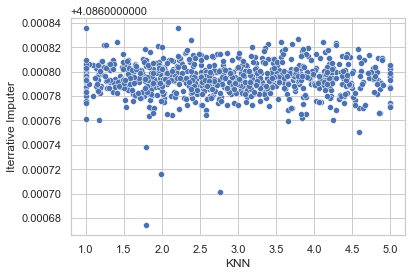

In [501]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x=x, y=y)
ax.set(xlabel='KNN', ylabel='Iterrative Imputer');

In [639]:
mask = data_imput2['M'].isna()
index = data_imput2[mask].index
x = data_imput300.iloc[index]['M']
y = data_imput200.iloc[index]['M']

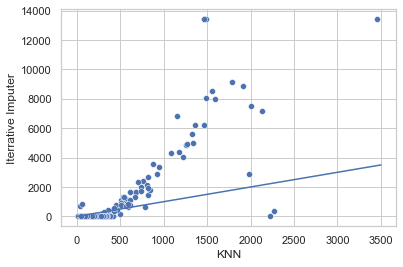

In [640]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax,x=x, y=y)
ax.set(xlabel='KNN', ylabel='Iterrative Imputer')
sns.lineplot(ax=ax, x=[0, 3500], y=[0, 3500]);

##### KNN/M remplacé par payment value

In [506]:
data_imput5 = data_imput2.copy()
mask5 = data_imput5['M'].isna()
data_imput5.loc[mask5, 'M'] = data_imput2.loc[mask5, 'payment_value']

In [507]:
x = data_imput300.iloc[index]['M']
y = data_imput5.iloc[index]['M']

[Text(0.5, 0, 'KNN'), Text(0, 0.5, 'payment value')]

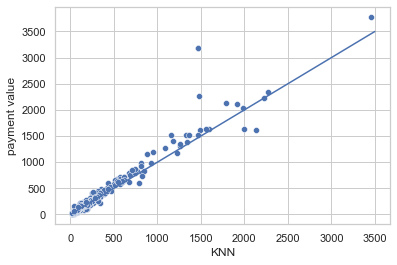

In [509]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax,x=x, y=y)
sns.lineplot(ax=ax, x=[0, 3500], y=[0, 3500])
ax.set(xlabel='KNN', ylabel='payment value')

##### Histplot avant / après imput

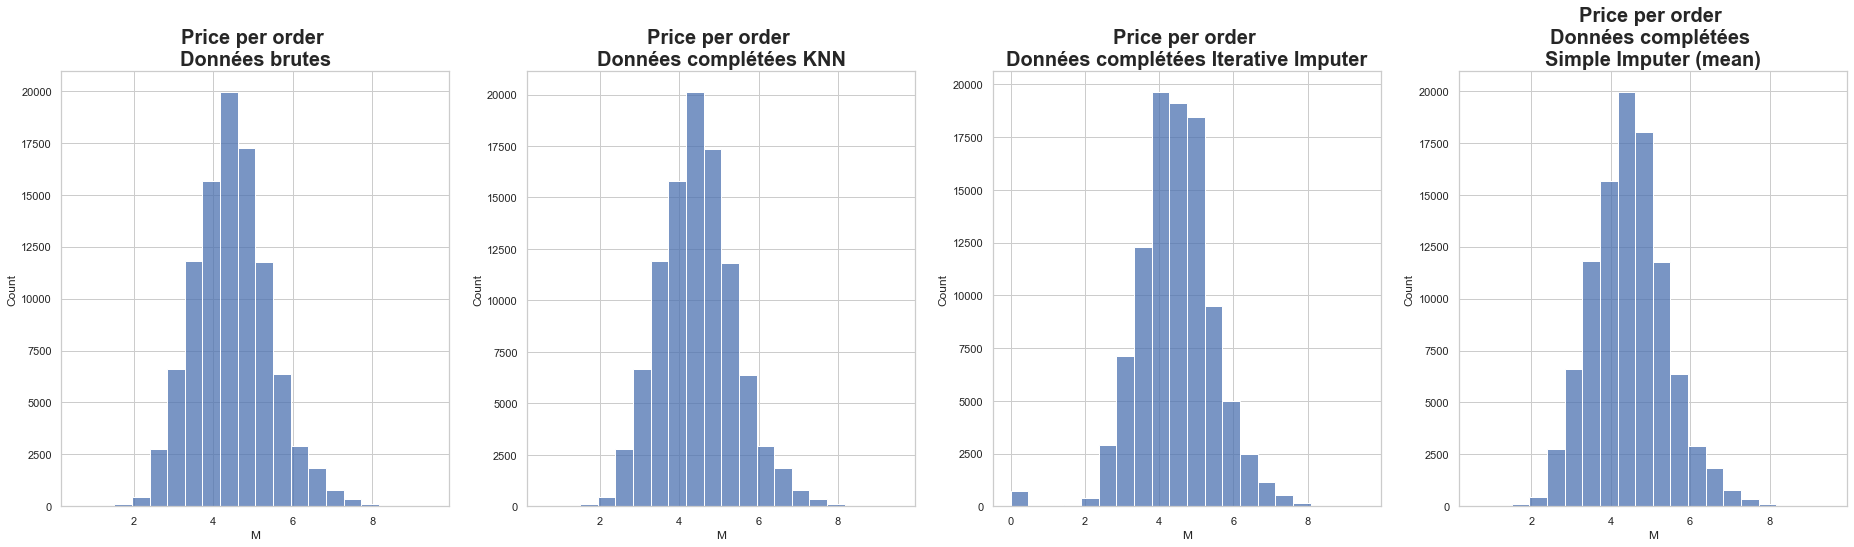

In [510]:
fig, ax = plt.subplots(1, 4, figsize=(32, 8))
sns.histplot(ax=ax[0], data= np.log(1+data_imput2['M']), bins=20)
sns.histplot(ax=ax[1], data= np.log(1+data_imput300['M']), bins=20)
sns.histplot(ax=ax[2], data= np.log(1+data_imput200['M']), bins=20)
sns.histplot(ax=ax[3], data= np.log(1+data_imput40['M']), bins=20)
ax[0].set_title('Price per order \nDonnées brutes', fontsize=20, weight='bold')
ax[1].set_title('Price per order \nDonnées complétées KNN', fontsize=20, weight='bold')
ax[2].set_title('Price per order \nDonnées complétées Iterative Imputer', fontsize=20, weight='bold')
ax[3].set_title('Price per order \nDonnées complétées \nSimple Imputer (mean)', fontsize=20, weight='bold');

### Imputation

In [370]:
# Strategie choisie : remplacer les valeurs manquantes de M par payment value
# Les autres valeurs manquantes sont remplacées par KNN

In [533]:
data_completed1 = data_imput2.copy()

In [534]:
mask = data_completed1['M'].isna()
data_completed1.loc[mask, 'M'] = data_imput2.loc[mask, 'payment_value']

In [535]:
scl = StandardScaler()
data_completed1_scaled = scl.fit_transform(data_completed1)

In [536]:
knn = KNNImputer(weights='distance')
data_completed = knn.fit_transform(data_completed1_scaled)
data_completed = scl.inverse_transform(data_completed)
data_completed = pd.DataFrame(columns=columns, data=data_completed)

In [544]:
data_completed['customer_unique_id'] = data2['customer_unique_id']

In [662]:
data_completed['date_of_purchase'] = data2['date_of_purchase']

In [663]:
data_completed.to_csv('data_per_order.csv')

In [666]:
data_completed.describe()

,week_end,week,morning,afternoon,evening,night,nb_tot_products,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,payment_sequential,payment_installments,payment_value,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher
count,9.944100e+04,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,9.944100e+04,9.944100e+04,99441.0,99441.000000,99441.000000
mean,2.297543e-01,0.770246,0.283937,0.325479,0.342354,0.048230,1.194712,23.758645,2105.210235,15237.716695,48.833140,794.428843,798.663527,2.236901,1.038187,1.013679,1.045518,2.930538,160.990790,4.078098,4.075970,4.080222,1.005607,4.164856e-01,4.827270e+02,1.0,142.518417,3.815776
std,4.206769e-01,0.420677,0.450909,0.468556,0.474500,0.214252,0.856427,27.510762,3748.698167,23315.781944,9.876698,648.059337,650.634807,1.723454,0.225760,0.121959,0.382177,2.715677,221.950202,1.348155,1.350589,1.347770,0.074885,4.944458e-01,1.536706e+02,0.0,222.851762,34.110823
min,2.775558e-17,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,168.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-5.551115e-17,5.684342e-14,1.0,0.000000,0.000000
25%,2.775558e-17,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.860000,300.000000,2850.000000,43.000000,356.000000,359.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.010000,4.000000,4.000000,4.000000,1.000000,0.000000e+00,3.730000e+02,1.0,46.000000,0.000000
50%,2.775558e-17,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.250000,700.000000,6512.000000,52.000000,612.000000,616.000000,2.000000,1.000000,1.000000,1.000000,2.000000,105.290000,5.000000,5.000000,5.000000,1.000000,0.000000e+00,5.010000e+02,1.0,88.900000,0.000000
75%,2.775558e-17,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,24.480000,1825.000000,18400.000000,57.000000,995.000000,999.000000,3.000000,1.000000,1.000000,1.000000,4.000000,176.970000,5.000000,5.000000,5.000000,1.000000,1.000000e+00,6.070000e+02,1.0,151.900000,0.000000
max,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,3508.000000,40425.000000,296208.000000,76.000000,3992.000000,3992.000000,20.000000,8.000000,5.000000,29.000000,24.000000,13664.080000,5.000000,5.000000,5.000000,3.000000,3.000000e+00,7.730000e+02,1.0,13440.000000,3184.340000


## Analyse statistique

In [585]:
data_completed.head(0)

,week_end,week,morning,afternoon,evening,night,nb_tot_products,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,payment_sequential,payment_installments,payment_value,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher,customer_unique_id


#### <font color='purple'>_Fonction data_date_</font>

In [671]:
# Fonction qui aggrège data par client antérieurement à une certaine date
def data_date(data, col_date, col_agg, date, dict_agg):
    """ 
    Filtre data avec col_date antérieure à date
    Aggrège data par col_agg suivant dict_agg
    Supprime col_agg
    
    date = datetime(year, month, day) 
    (ex : data_datedatetime(2022, 10, 10)) 
    """
    mask = data[col_date] < date
    data_filtered = data[mask]
    data_grouped = data_filtered.groupby(col_agg).agg(dict_agg).reset_index()
    data_final = data_grouped.drop(col_agg, axis=1)
    return data_final

#### <font color='purple'>_Fonction data_date_id_</font>

In [672]:
# Idem mais conserve customer id
def data_date_id(data, col_date, col_agg, date, dict_agg):
    """ 
    Filtre data avec col_date antérieure à date
    Aggrège data par col_agg suivant dict_agg
    
    date = datetime(year, month, day) 
    (ex : data_datedatetime(2022, 10, 10)) 
    """
    mask = data[col_date] < date
    data_filtered = data[mask]
    data_grouped = data_filtered.groupby(col_agg).agg(dict_agg).reset_index()
    return data_grouped

#### <font color='purple'>_Fonction ratio_</font>

In [673]:
def ratio(data, col1, col2):
    """ 
    remplace col1 par le pourcentage que représente col1 par rapport à col2
    """
    data1 = data.copy()
    mask = data1[col2] != 0
    data1.loc[mask, col1] = data1.loc[mask, col1]/data1.loc[mask, col2]*100
    data1 = data1.drop(col2, axis=1)
    return data1

In [589]:
# Dictionnaire pour l'aggrégation
aggregation = {'R':'min', 'F': 'sum', 'M': 'mean', 'voucher':'sum', 'payment_value': 'sum', 
               'review_score_mean':'mean'}

### Evolution des features

#### <font color='purple'>_Fonction features_plot_</font>

In [692]:
def features_plot(data, col_date, col_agg, dict_agg, col1, col2, feature):
    """
    Trace la moyenne de feature en fonction du temps
    (un point tous les 30 jours)
    """
    begin_date = pd.to_datetime(data[col_date].min()).date()
    end_date = pd.to_datetime(data[col_date].max()).date()
    nb_days = (end_date-begin_date).days//30
    x = [end_date - i * pd.Timedelta(30, unit='D') for i in range(nb_days)]
    features = []   
    for j in range(len(x)):
        data_time1 = data_date(data, col_date, col_agg, x[j], dict_agg)
        data_time = ratio(data_time1, col1, col2)
        features += [data_time[feature].mean()]
    fig, ax = plt.subplots(figsize=(8, 4))
    y = [features[i] for i in range(nb_days)]
    sns.lineplot(ax=ax, x=x, y=y)
    ax.set_title(f"{feature} - Mean", weight='bold')
    fig.savefig(f"evolution_{feature}.pdf");

#### M - Montant moyen par commande

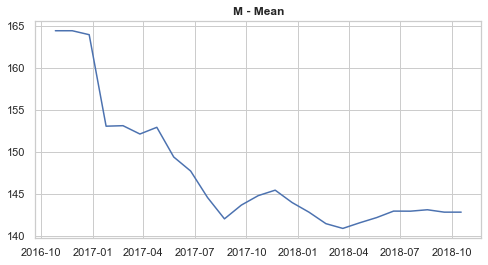

In [693]:
features_plot(data_completed, 'date_of_purchase', 'customer_unique_id', aggregation, 'voucher', 'payment_value', 'M')

#### F - Nombre de commandes par client

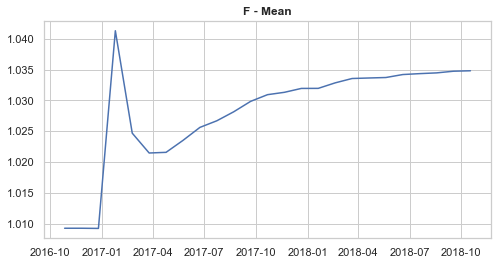

In [694]:
features_plot(data_completed, 'date_of_purchase', 'customer_unique_id', aggregation, 'voucher', 'payment_value', 'F')

#### R - Ancienneté moyenne dernière commande

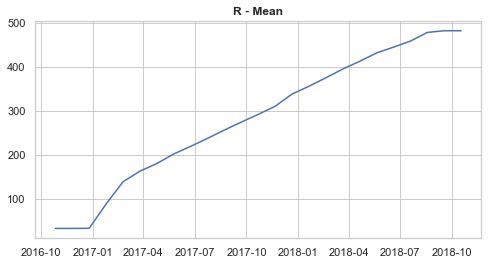

In [695]:
features_plot(data_completed, 'date_of_purchase', 'customer_unique_id', aggregation, 'voucher', 'payment_value', 'R')

#### Voucher

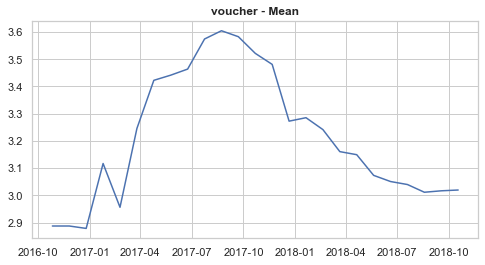

In [696]:
features_plot(data_completed, 'date_of_purchase', 'customer_unique_id', aggregation, 'voucher', 'payment_value', 'voucher')

#### Review score

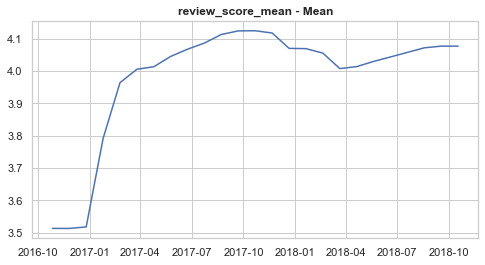

In [697]:
features_plot(data_completed, 'date_of_purchase', 'customer_unique_id', aggregation, 'voucher', 'payment_value', 'review_score_mean')

#### Number of customers

#### <font color='purple'>_Fonction nb_customers_plot_</font>

In [700]:
def nb_customers_plot(data, col_date, col_agg, dict_agg):
    begin_date = pd.to_datetime(data[col_date].min()).date()
    end_date = pd.to_datetime(data[col_date].max()).date()
    nb_days = end_date-begin_date
    nb_periods = nb_days.days//30
    delta = [end - i * pd.Timedelta(30, unit='D') for i in range(nb_periods)]
    numbers = []   
    for j in range(len(delta)):
        data_time = data_date(data, col_date, col_agg, delta[j], dict_agg)
        numbers += [len(data_time)]
    fig, ax = plt.subplots(figsize=(8, 4))
    x = [delta[i] for i in range(nb_periods)]
    y = [numbers[i] for i in range(nb_periods)]
    sns.lineplot(ax=ax, x=x, y=y)
    ax.set_title("Number of customers", weight='bold')
    fig.savefig('Number_of_customers.pdf')

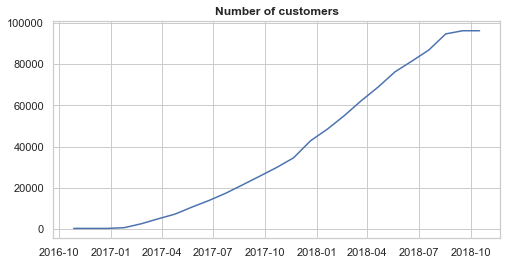

In [701]:
nb_customers_plot(data_completed, 'date_of_purchase', 'customer_unique_id', aggregation)

# Dataset final par client

In [556]:
data3 = data_completed.groupby('customer_unique_id').agg({ 'week_end': 'sum', 
                                                 'week': 'sum', 
                                                 'morning': 'sum', 
                                                 'afternoon': 'sum', 
                                                 'evening': 'sum', 
                                                 'night': 'sum', 
                                                 'nb_tot_products': 'mean',  
                                                 'freight_value_sum': 'mean', 
                                                 'product_weight_g_mean': 'mean', 
                                                 'clutter_mean': 'mean',  
                                                 'product_name_lenght_mean': 'mean', 
                                                 'product_description_lenght_mean': 'mean', 
                                                 'product_photos_qty_min' : 'min', 
                                                 'nb_dif_products' : 'mean', 
                                                 'nb_dif_sellers': 'mean', 
                                                 'payment_sequential': 'max', 
                                                 'payment_installments': 'max', 
                                                 'payment_value': 'sum', 
                                                 'review_score_mean' : 'mean', 
                                                 'review_score_min' : 'min', 
                                                 'review_score_max' : 'max',  
                                                 'nb_review_score_per_order' : 'mean', 
                                                 'nb_comments_per_order' : 'mean', 
                                                 'R': 'min', 
                                                 'F': 'sum', 
                                                 'M': 'mean', 
                                                 'voucher': 'sum'}).reset_index()

In [558]:
mask = data3['payment_value'] != 0
data3.loc[mask, 'voucher'] = data3.loc[mask, 'voucher']/data3.loc[mask, 'payment_value']*100

In [561]:
# Ajout des colonnes construites par client
data4 = pd.merge(data3, number_orders, left_on='customer_unique_id', right_on='customer_unique_id', how='outer')

In [562]:
data4 = pd.merge(data4, delay_between_orders, left_on='customer_unique_id', right_on='customer_unique_id', how='outer')

In [563]:
data4 = pd.merge(data4, new_category, left_on='customer_unique_id', right_on='customer_unique_id', how='outer')
data4.shape

(96096, 36)

In [564]:
data4 = pd.merge(data4, new_payment, left_on='customer_unique_id', right_on='customer_unique_id', how='outer')

In [565]:
data4 = pd.merge(data4, last_customer_state2, left_on='customer_unique_id', right_on='customer_unique_id', how='outer')

In [566]:
data4.loc[data4['cat1'].isna()]

,customer_unique_id,week_end,week,morning,afternoon,evening,night,nb_tot_products,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_min,nb_dif_products,nb_dif_sellers,payment_sequential,payment_installments,payment_value,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher,nb_orders,delay_between_orders,cat1,cat2,cat3,cat4,cat5,nb_diff_cat,payment_type1,payment_type2,payment_type3,nb_payment_type,last_customer_state
96095,ffffd2657e2aad2907e67c3e9daecbeb,2.775558e-17,1.0,0.0,0.0,1.0,0.0,1.0,14.57,400.0,2178.0,45.0,1003.0,2.0,1.0,1.0,1.0,4.0,71.56,5.0,5.0,5.0,1.0,0.0,240.0,1.0,56.99,0.0,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PR


In [574]:
data4.loc[data4['cat1'].isna(), 'cat1'] = 'unknown'

In [569]:
data4.isna().sum()

customer_unique_id                     0
week_end                               0
week                                   0
morning                                0
afternoon                              0
evening                                0
night                                  0
nb_tot_products                        0
freight_value_sum                      0
product_weight_g_mean                  0
clutter_mean                           0
product_name_lenght_mean               0
product_description_lenght_mean        0
product_photos_qty_min                 0
nb_dif_products                        0
nb_dif_sellers                         0
payment_sequential                     0
payment_installments                   0
payment_value                          0
review_score_mean                      0
review_score_min                       0
review_score_max                       0
nb_review_score_per_order              0
nb_comments_per_order                  0
R               

In [575]:
data4.to_csv('data_per_customer.csv')

## Analyse statistique

In [3]:
data4 = pd.read_csv('data_per_customer.csv')

/var/folders/cg/rgv17yks2975h8b2p1c414640000gn/T/ipykernel_1372/4152693305.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data4 = pd.read_csv('data_per_customer.csv')


In [4]:
mask = data4['F']>1
multiple_customer_rate = len(data4[mask])/len(data4)*100
multiple_customer_rate

3.1187562437562435

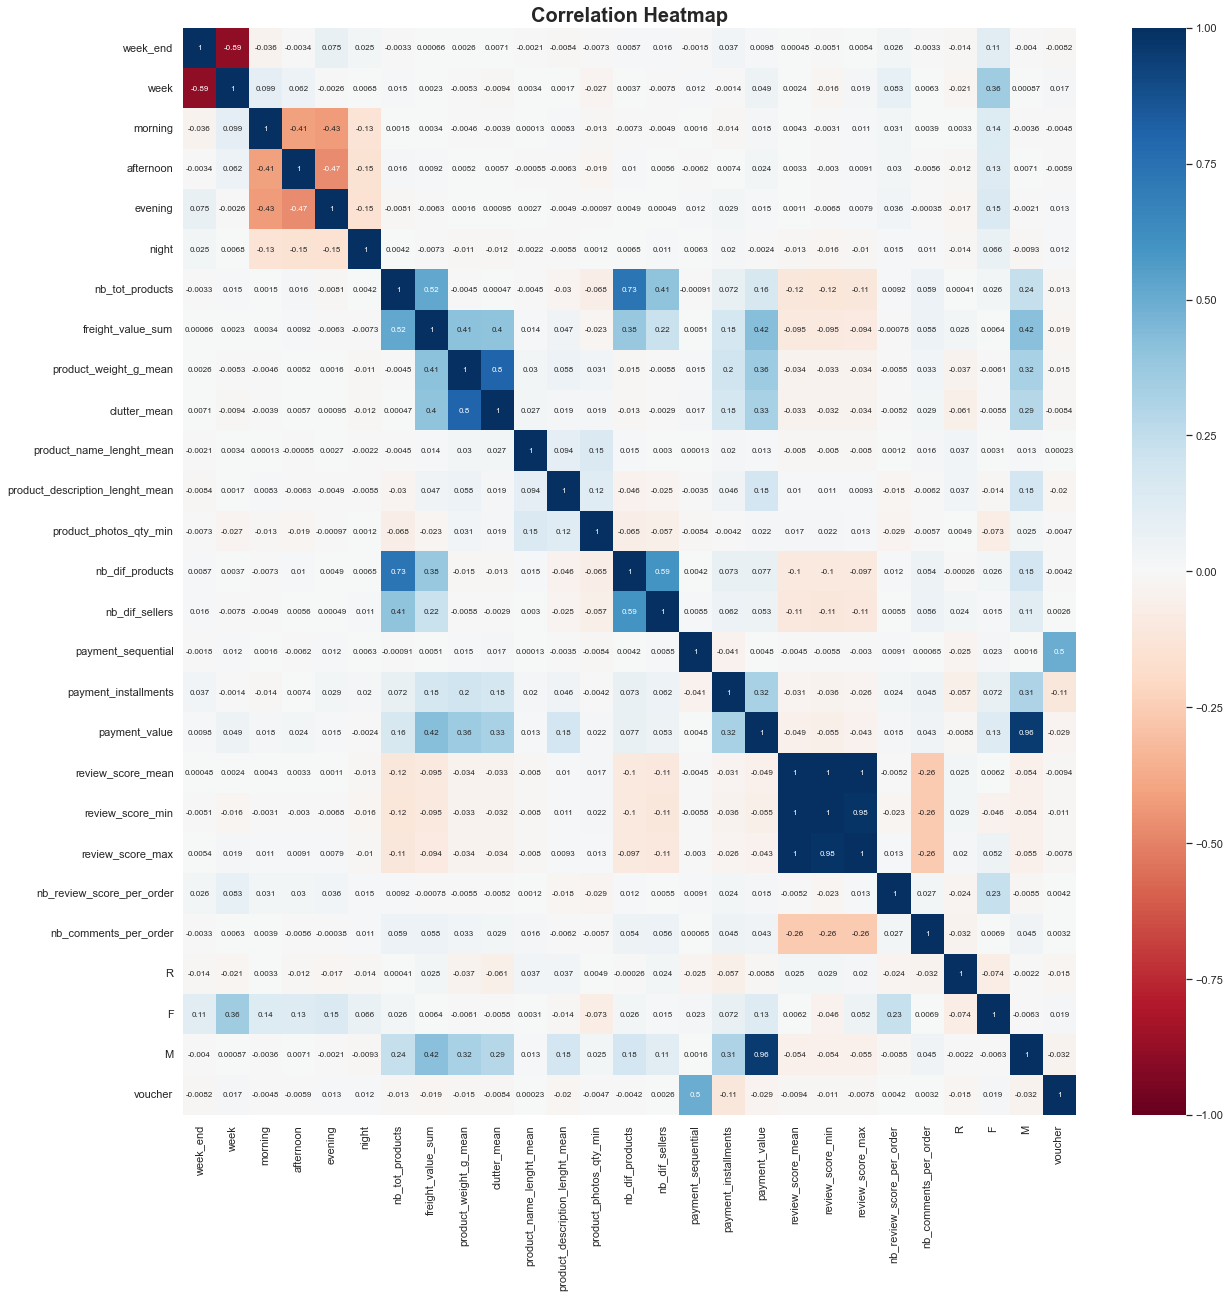

In [5]:
dataheat = data4.loc[:, 'week_end': 'voucher']
plt.figure(figsize=(20, 20))
sns.heatmap(dataheat.corr(),cmap='RdBu', annot=True, annot_kws={'size':8}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize=20, weight='bold')
plt.yticks(rotation =0);

### Pairplot

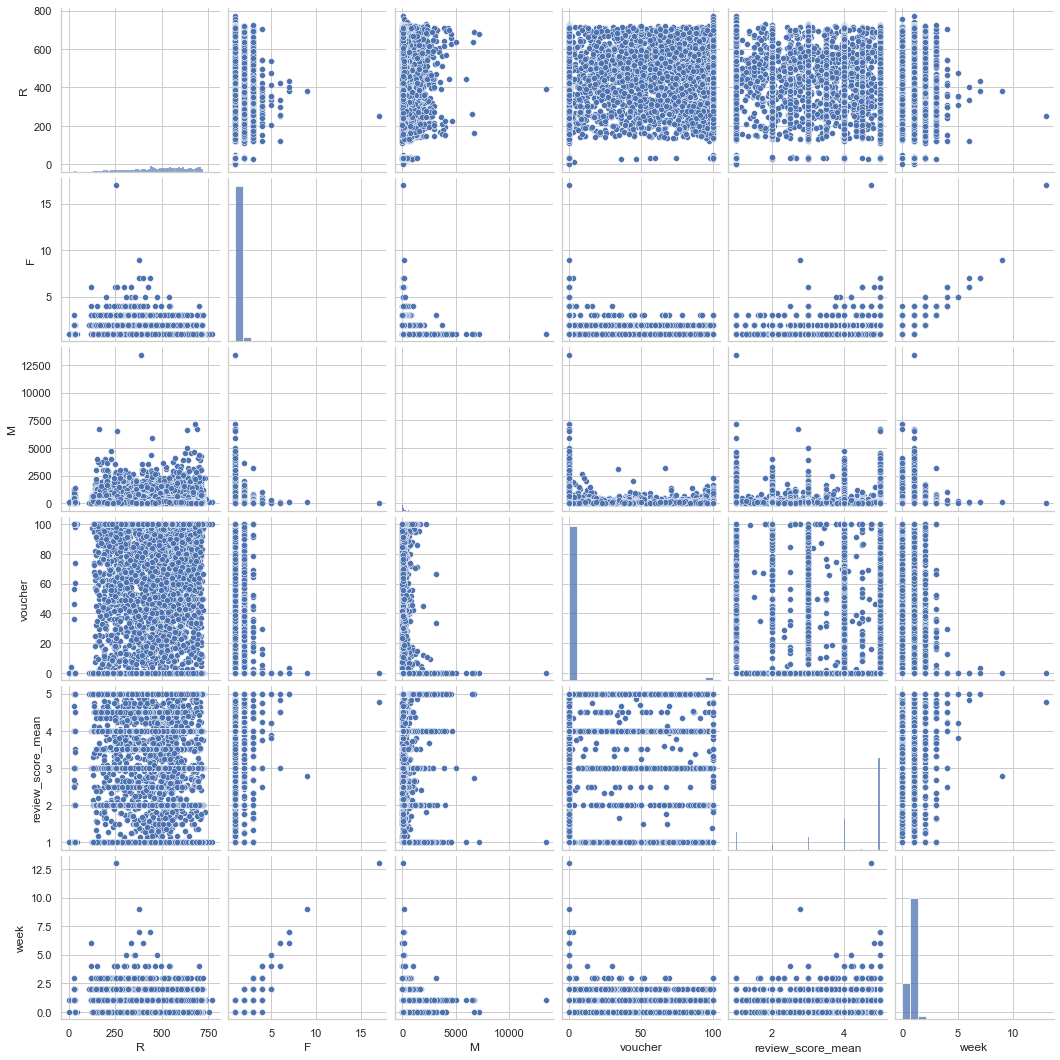

In [702]:
pairplot_data = data4.loc[:, ['R', 'F', 'M', 'voucher', 'review_score_mean', 'week']]
sns.pairplot(pairplot_data);

### Quelques distributions
#### Last customer state

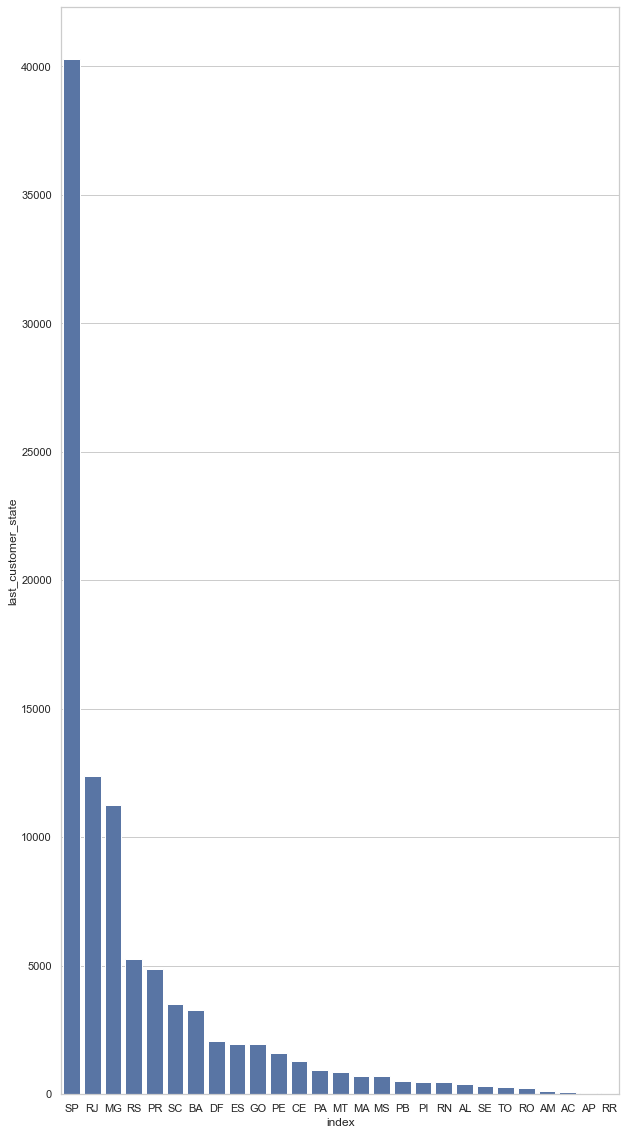

In [617]:
data_state = pd.DataFrame(data4['last_customer_state'].value_counts()).reset_index()

fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(ax=ax, data=data_state, x='index', y='last_customer_state', color='b');

#### Montant

<AxesSubplot:xlabel='M', ylabel='Count'>

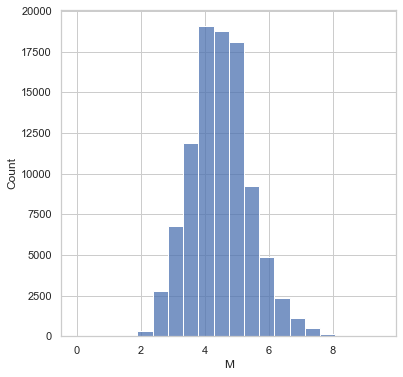

In [618]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(ax=ax, data= np.log(1+data4['M']), bins=20)

#### freight_value_sum

<AxesSubplot:xlabel='freight_value_sum', ylabel='Count'>

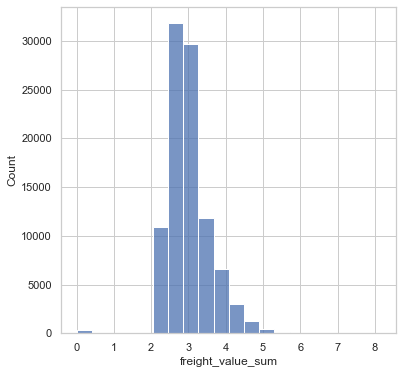

In [620]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(ax=ax, data= np.log(1+data4['freight_value_sum']), bins=20)

#### product_description_lenght_mean

<AxesSubplot:xlabel='product_description_lenght_mean', ylabel='Count'>

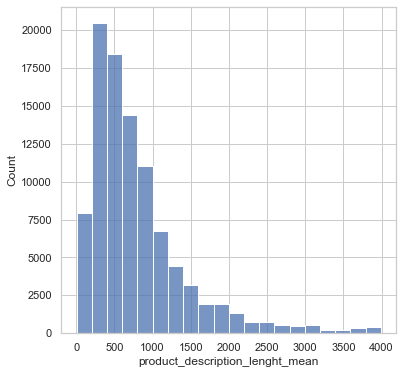

In [621]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(ax=ax, data= (data4['product_description_lenght_mean']), bins=20)

#### nb_tot_products

<AxesSubplot:xlabel='nb_tot_products', ylabel='Count'>

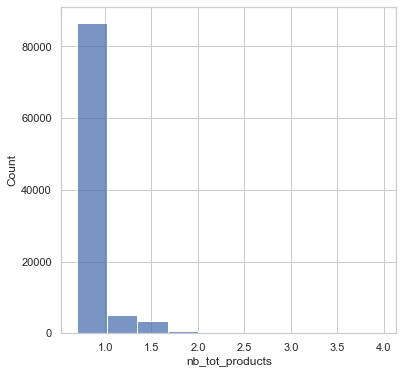

In [622]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(ax=ax, data= (np.log(1+data4['nb_tot_products'])), bins=10)

#### Relation score et nb commandes

In [623]:
data5 = data4.round(2)

In [278]:
data5.head(1)

,customer_unique_id,date_of_purchase_min,date_of_purchase_max,week_end_sum,week_sum,morning_sum,afternoon_sum,evening_sum,night_sum,nb_tot_products_mean,price_sum_mean,freight_value_sum_mean,product_weight_g_mean_mean,clutter_mean_mean,product_name_lenght_mean_mean,product_description_lenght_mean_mean,product_photos_qty_min_min,nb_dif_products_mean,nb_dif_sellers_mean,payment_sequential_max,payment_installments_max,payment_value_sum,review_score_mean_mean,review_score_min_min,review_score_max_max,nb_review_score_per_order_mean,nb_comments_per_order_mean,voucher_sum,nb_orders,delay_between_orders,cat1,cat2,cat3,cat4,cat5,nb_diff_cat,payment_type1,payment_type2,payment_type3,nb_payment_type,last_customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-10,0,1,1,0,0,0,1.0,129.9,12.0,1500.0,7616.0,60.0,236.0,1.0,1.0,1.0,1.0,8.0,141.9,5.0,5.0,5.0,1.0,1.0,0.0,1,NaN,bed_bath_table,None,None,None,None,1.0,credit_card,None,None,1.0,SP


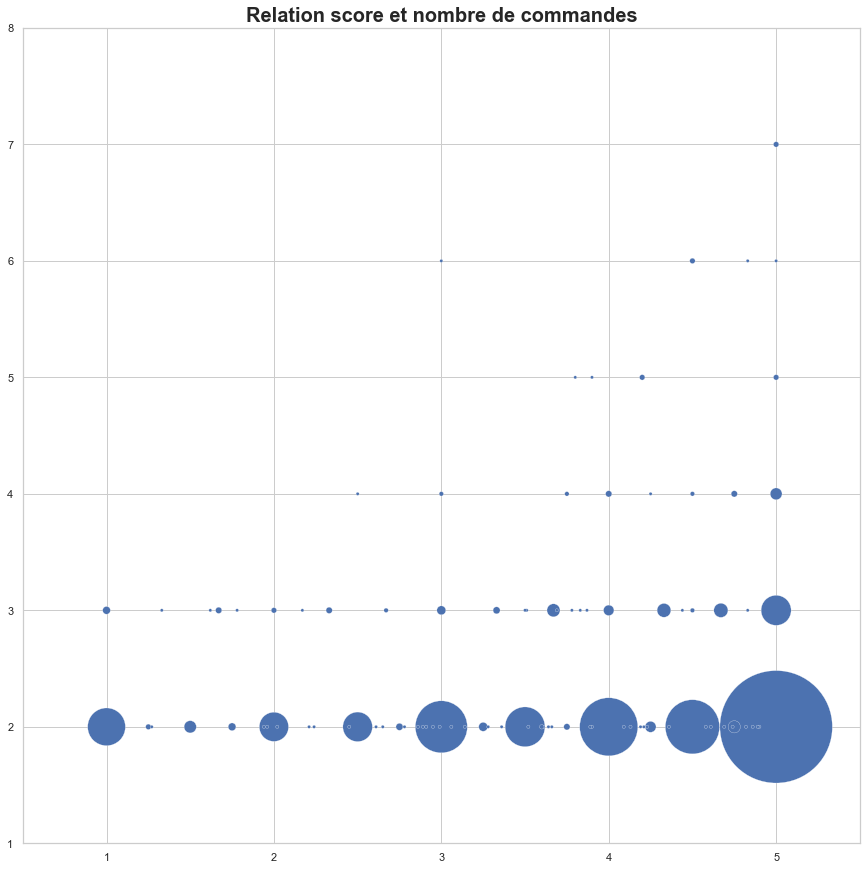

In [627]:
sizes = {} 
for (yt, yp) in zip(data5.loc[data5['review_score_mean'].notna()].loc[data5['F']>1]['review_score_mean'].to_list(), data5.loc[data5['review_score_mean'].notna()].loc[data5['nb_orders']>1]['nb_orders'].to_list()):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(ax=ax, data=keys,
        x=[k[0] for k in keys],
        y=[k[1] for k in keys],
        s=[10*sizes[k] for k in keys])
ax.set_title('Relation score et nombre de commandes', fontsize=20, weight='bold')
ax.set_ylim(1, 8)
ax.set_xlim(0.5, 5.5);

In [628]:
data5

,customer_unique_id,week_end,week,morning,afternoon,evening,night,nb_tot_products,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_min,nb_dif_products,nb_dif_sellers,payment_sequential,payment_installments,payment_value,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher,nb_orders,delay_between_orders,cat1,cat2,cat3,cat4,cat5,nb_diff_cat,payment_type1,payment_type2,payment_type3,nb_payment_type,last_customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,12.00,1500.0,7616.0,60.0,236.0,1.0,1.0,1.0,1.0,8.0,141.90,5.0,5.0,5.0,1.0,1.0,613.0,1.0,129.90,0.0,1,NaN,bed_bath_table,None,None,None,None,1.0,credit_card,None,None,1.0,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,1.0,1.0,0.0,0.0,0.0,1.0,8.29,375.0,5148.0,56.0,635.0,1.0,1.0,1.0,1.0,1.0,27.19,4.0,4.0,4.0,1.0,0.0,610.0,1.0,18.90,0.0,1,NaN,health_beauty,None,None,None,None,1.0,credit_card,None,None,1.0,SP
2,0000f46a3911fa3c0805444483337064,0.0,1.0,0.0,0.0,1.0,0.0,1.0,17.22,1500.0,43750.0,49.0,177.0,3.0,1.0,1.0,1.0,8.0,86.22,3.0,3.0,3.0,1.0,0.0,187.0,1.0,69.00,0.0,1,NaN,stationery,None,None,None,None,1.0,credit_card,None,None,1.0,SC
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,1.0,0.0,0.0,1.0,0.0,1.0,17.63,150.0,1045.0,43.0,1741.0,5.0,1.0,1.0,1.0,4.0,43.62,4.0,4.0,4.0,1.0,1.0,403.0,1.0,25.99,0.0,1,NaN,telephony,None,None,None,None,1.0,credit_card,None,None,1.0,PA
4,0004aac84e0df4da2b147fca70cf8255,0.0,1.0,0.0,0.0,1.0,0.0,1.0,16.89,6050.0,528.0,58.0,794.0,3.0,1.0,1.0,1.0,6.0,196.89,5.0,5.0,5.0,1.0,0.0,436.0,1.0,180.00,0.0,1,NaN,telephony,None,None,None,None,1.0,credit_card,None,None,1.0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,1.0,0.0,0.0,1.0,0.0,3.0,736.56,30000.0,251625.0,54.0,478.5,1.0,2.0,1.0,1.0,10.0,2067.42,5.0,5.0,5.0,1.0,0.0,277.0,1.0,2250.00,0.0,1,NaN,health_beauty,None,None,None,None,1.0,credit_card,None,None,1.0,PE
96092,fffea47cd6d3cc0a88bd621562a9d061,1.0,0.0,0.0,0.0,1.0,0.0,1.0,19.69,1720.0,32076.0,37.0,506.0,2.0,1.0,1.0,1.0,1.0,84.58,4.0,4.0,4.0,1.0,0.0,462.0,1.0,64.89,0.0,1,NaN,baby,None,None,None,None,1.0,credit_card,None,None,1.0,BA
96093,ffff371b4d645b6ecea244b27531430a,0.0,1.0,0.0,1.0,0.0,0.0,1.0,22.56,600.0,3315.0,57.0,716.0,5.0,1.0,1.0,1.0,1.0,112.46,5.0,5.0,5.0,1.0,0.0,156.0,1.0,89.90,0.0,1,NaN,auto,None,None,None,None,1.0,credit_card,None,None,1.0,MT
96094,ffff5962728ec6157033ef9805bacc48,0.0,1.0,0.0,1.0,0.0,0.0,1.0,18.69,444.0,4480.0,35.0,591.0,3.0,1.0,1.0,1.0,5.0,133.69,5.0,5.0,5.0,1.0,1.0,605.0,1.0,115.00,0.0,1,NaN,watches_gifts,None,None,None,None,1.0,credit_card,None,None,1.0,ES


In [629]:
data_pairplot = data5.loc[:, 'nb_tot_products': 'voucher']

In [ ]:
#sns.pairplot(data_pairplot)

In [ ]:
#fig.savefig('pairplot.pdf')

In [634]:
data1.describe()

,week_end,week,morning,afternoon,evening,night,nb_tot_products,price_sum,freight_value_sum,product_weight_g_mean,clutter_mean,product_name_lenght_mean,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,nb_dif_products,nb_dif_sellers,diff_cat,payment_sequential,payment_installments,payment_value,voucher_x,nb_payment_types,voucher_y,review_score_mean,review_score_min,review_score_max,nb_review_score_per_order,nb_comments_per_order,R,F,M,voucher
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,98665.000000,98665.000000,98665.000000,98649.000000,98649.000000,97276.000000,97276.000000,97276.000000,97276.000000,98665.000000,98665.000000,98665.000000,99440.000000,99440.000000,99440.000000,99437.000000,99440.000000,99440.000000,98673.000000,98673.000000,98673.000000,98673.000000,98673.000000,99441.000000,99441.0,98665.000000,99437.000000
mean,0.229754,0.770246,0.283937,0.325479,0.342354,0.048230,1.194355,141.989400,23.751974,2103.711084,15225.193066,48.843316,794.098043,798.360808,2.236903,1.038099,1.013622,1.008149,1.045515,2.930521,160.990267,3.087948,1.022586,0.038878,4.086793,4.084704,4.088879,1.005584,0.415281,482.727044,1.0,141.989400,3.815852
std,0.420677,0.420677,0.450909,0.468556,0.474500,0.214252,0.858969,221.360555,27.574801,3756.926768,23371.033711,9.956536,652.995354,655.604640,1.737865,0.226458,0.122298,0.091909,0.382177,2.715685,221.951257,16.271910,0.148582,0.193304,1.346274,1.348694,1.345905,0.075060,0.495685,153.670615,0.0,221.360555,34.111500
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.850000,0.000000,0.000000,168.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.850000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.980000,13.850000,300.000000,2816.000000,42.000000,351.000000,353.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.010000,0.000000,1.000000,0.000000,4.000000,4.000000,4.000000,1.000000,0.000000,373.000000,1.0,45.980000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,88.340000,17.220000,700.000000,6426.000000,52.000000,608.000000,612.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,105.290000,0.000000,1.000000,0.000000,5.000000,5.000000,5.000000,1.000000,0.000000,501.000000,1.0,88.340000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,150.900000,24.430000,1813.000000,18375.000000,57.000000,996.000000,1000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,176.970000,0.000000,1.000000,0.000000,5.000000,5.000000,5.000000,1.000000,1.000000,607.000000,1.0,150.900000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,13440.000000,3508.000000,40425.000000,296208.000000,76.000000,3992.000000,3992.000000,20.000000,8.000000,5.000000,3.000000,29.000000,24.000000,13664.080000,100.000000,2.000000,1.000000,5.000000,5.000000,5.000000,3.000000,3.000000,773.000000,1.0,13440.000000,3184.340000
